In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/1512-benchmark_dataloader")

In [3]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers"]

In [4]:
df_dataloader = extract_pandas(output_base_folder, folder_filter="*dataloader*")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3156/3156 [00:18<00:00, 167.63it/s]


In [5]:
df_dataloader_zeroworkers=df_dataloader[df_dataloader["num_workers"]==1]

In [6]:
print(df_dataloader_zeroworkers.groupby(group_by_dataloader).groups.keys())

dict_keys([('s3', 1, 1), ('s3', 2, 1), ('s3', 4, 1), ('s3', 8, 1), ('s3', 16, 1), ('s3', 32, 1), ('scratch', 1, 1), ('scratch', 2, 1), ('scratch', 4, 1), ('scratch', 8, 1), ('scratch', 16, 1), ('scratch', 32, 1)])


In [7]:
s3_dataset = df_dataloader[df_dataloader["dataset"]=="s3"]
scratch_dataset = df_dataloader[df_dataloader["dataset"]=="scratch"]

In [8]:
# display(get_run_stats(s3_dataset, group_by=group_by_dataloader))
# display(get_run_stats(scratch_dataset, group_by=group_by_dataloader))

In [9]:
display(get_thread_stats(s3_dataset,group_by=group_by_dataloader))
display(get_thread_stats(scratch_dataset,group_by=group_by_dataloader))

time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
139626932807424       1.639572e+09     1.639572e+09             71.473956   
139626941200128       1.639572e+09     1.639572e+09            115.832931   
139626949592832       1.639572e+09     1.639572e+09             42.379841   
139627471427328       1.639572e+09     1.639572e+09             24.339083   
139627513374464       1.639572e+09     1.639572e+09              6.409917   
...                            ...              ...                   ...   
140692519671552       1.639572e+09     1.639572e+09             34.653670   
140692561618688       1.639572e+09     1.639572e+09             35.370844   
140692603565824       1.639572e+09     1.639572e+09             55.992985   
140692645512960       1.639572e+09     1.639572e+09             40.596981   
140692729407232       1.639572e+09     1.639572e+09             18.130094   

                dataset  num_fetch_workers  num_workers  elapsed_thread  \
threading_ident                                                           
139626932807424      s3                  2            8       13.964759   
139626941200128      s3                  2            8       16.561990   
139626949592832      s3                  2            8       10.446011   
139627471427328      s3                  2            8       12.693544   
139627513374464      s3                  2            8        3.209927   
...                 ...                ...          ...             ...   
140692519671552      s3                  2            4       15.017874   
140692561618688      s3                  2            4       17.460041   
140692603565824      s3                  2            4       20.565441   
140692645512960      s3                  2            4       16.638823   
140692729407232      s3                  2            4       10.323088   

                 elapsed_processing  
threading_ident                      
139626932807424            5.118166  
139626941200128            6.993902  
139626949592832            4.057036  
139627471427328            1.917438  
139627513374464            1.996904  
...                             ...  
140692519671552            2.307495  
140692561618688            2.025817  
140692603565824            2.722674  
140692645512960            2.439895  
140692729407232            1.756266  

[2864 rows x 8 columns]

time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
139635410409216       1.639573e+09     1.639573e+09             12.013846   
139635418801920       1.639573e+09     1.639573e+09              9.894314   
139635427194624       1.639573e+09     1.639573e+09              0.804982   
139635435587328       1.639573e+09     1.639573e+09              0.793040   
139635949029120       1.639573e+09     1.639573e+09              2.216576   
...                            ...              ...                   ...   
140705897584384       1.639573e+09     1.639573e+09              1.566539   
140705904584448       1.639573e+09     1.639573e+09              0.726954   
140705904846592       1.639573e+09     1.639573e+09              1.124008   
140705912977152       1.639573e+09     1.639573e+09              0.710869   
140705913239296       1.639573e+09     1.639573e+09              1.640955   

                 dataset  num_fetch_workers  num_workers  elapsed_thread  \
threading_ident                                                            
139635410409216  scratch                 16            4        3.852992   
139635418801920  scratch                 16            4        3.924998   
139635427194624  scratch                 16            4        0.192882   
139635435587328  scratch                 16            4        0.187676   
139635949029120  scratch                 16            4        2.448743   
...                  ...                ...          ...             ...   
140705897584384  scratch                 16            8        1.304347   
140705904584448  scratch                 16            8        0.206462   
140705904846592  scratch                 16            8        0.400866   
140705912977152  scratch                 16            8        0.198452   
140705913239296  scratch                 16            8        1.277628   

                 elapsed_processing  
threading_ident                      
139635410409216            3.118057  
139635418801920            2.520846  
139635427194624            4.173454  
139635435587328            4.225572  
139635949029120            0.905189  
...                             ...  
140705897584384            1.201014  
140705904584448            3.521006  
140705904846592            2.803952  
140705912977152            3.582070  
140705913239296            1.284376  

[2184 rows x 8 columns]

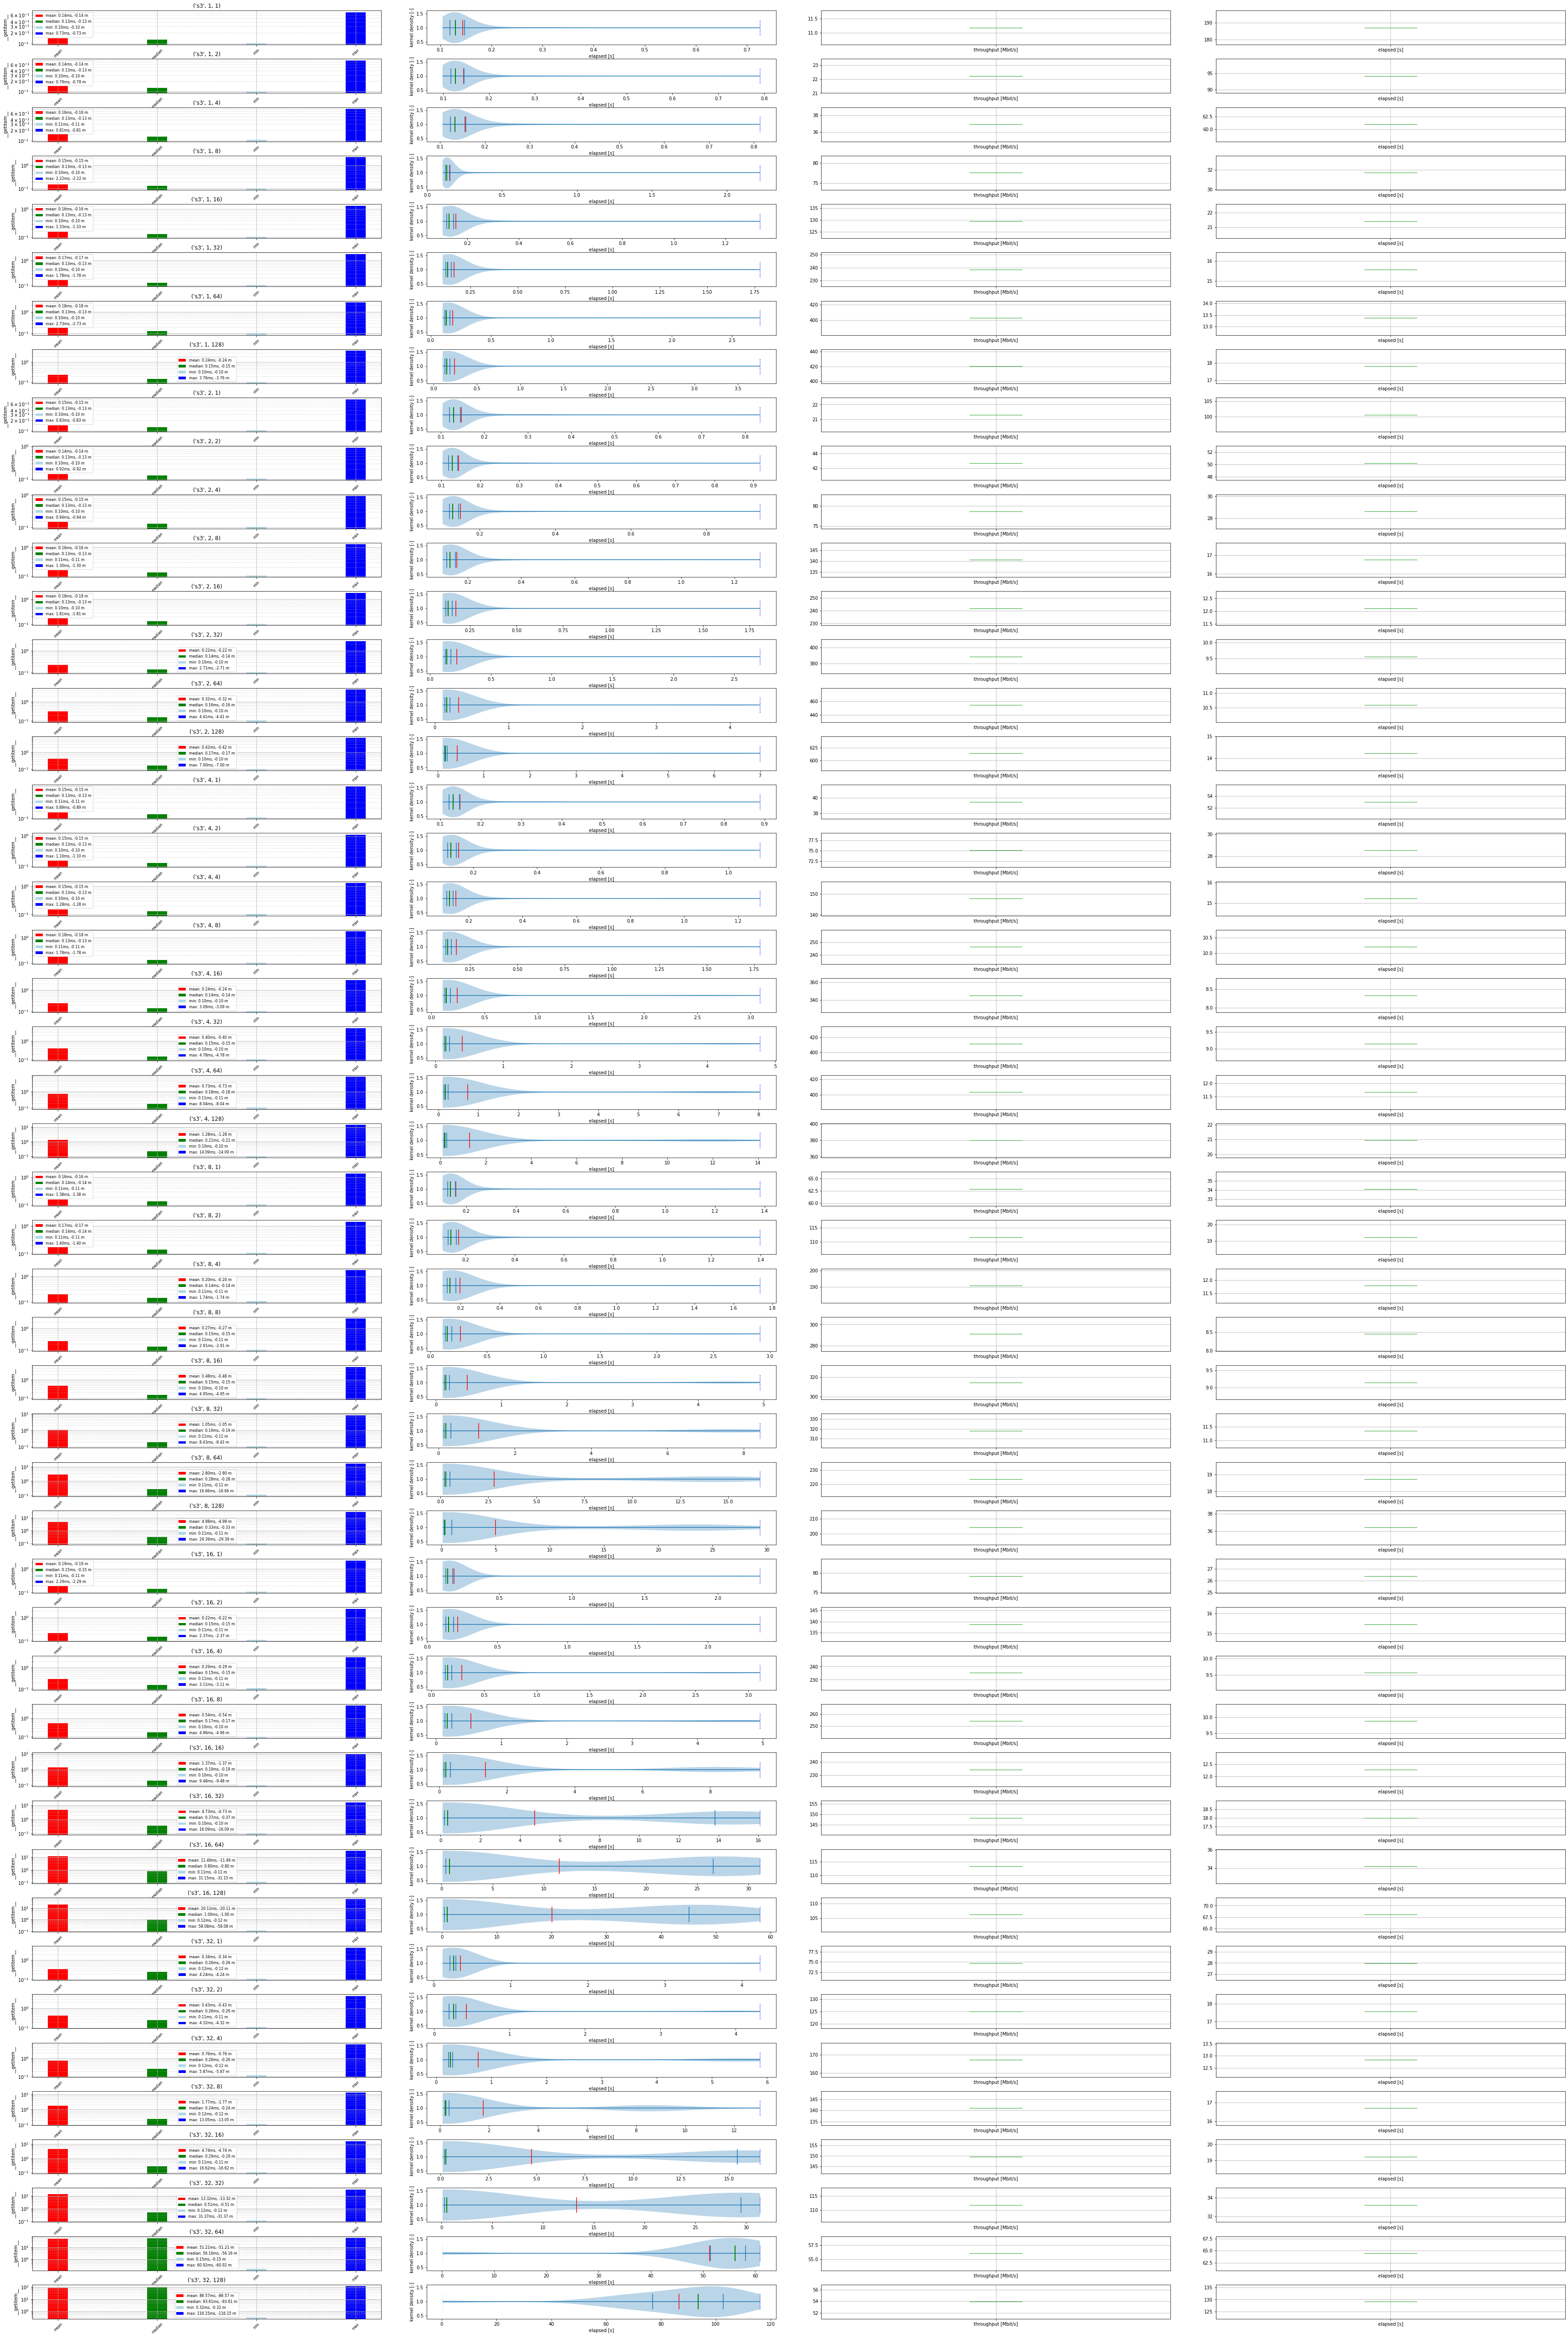

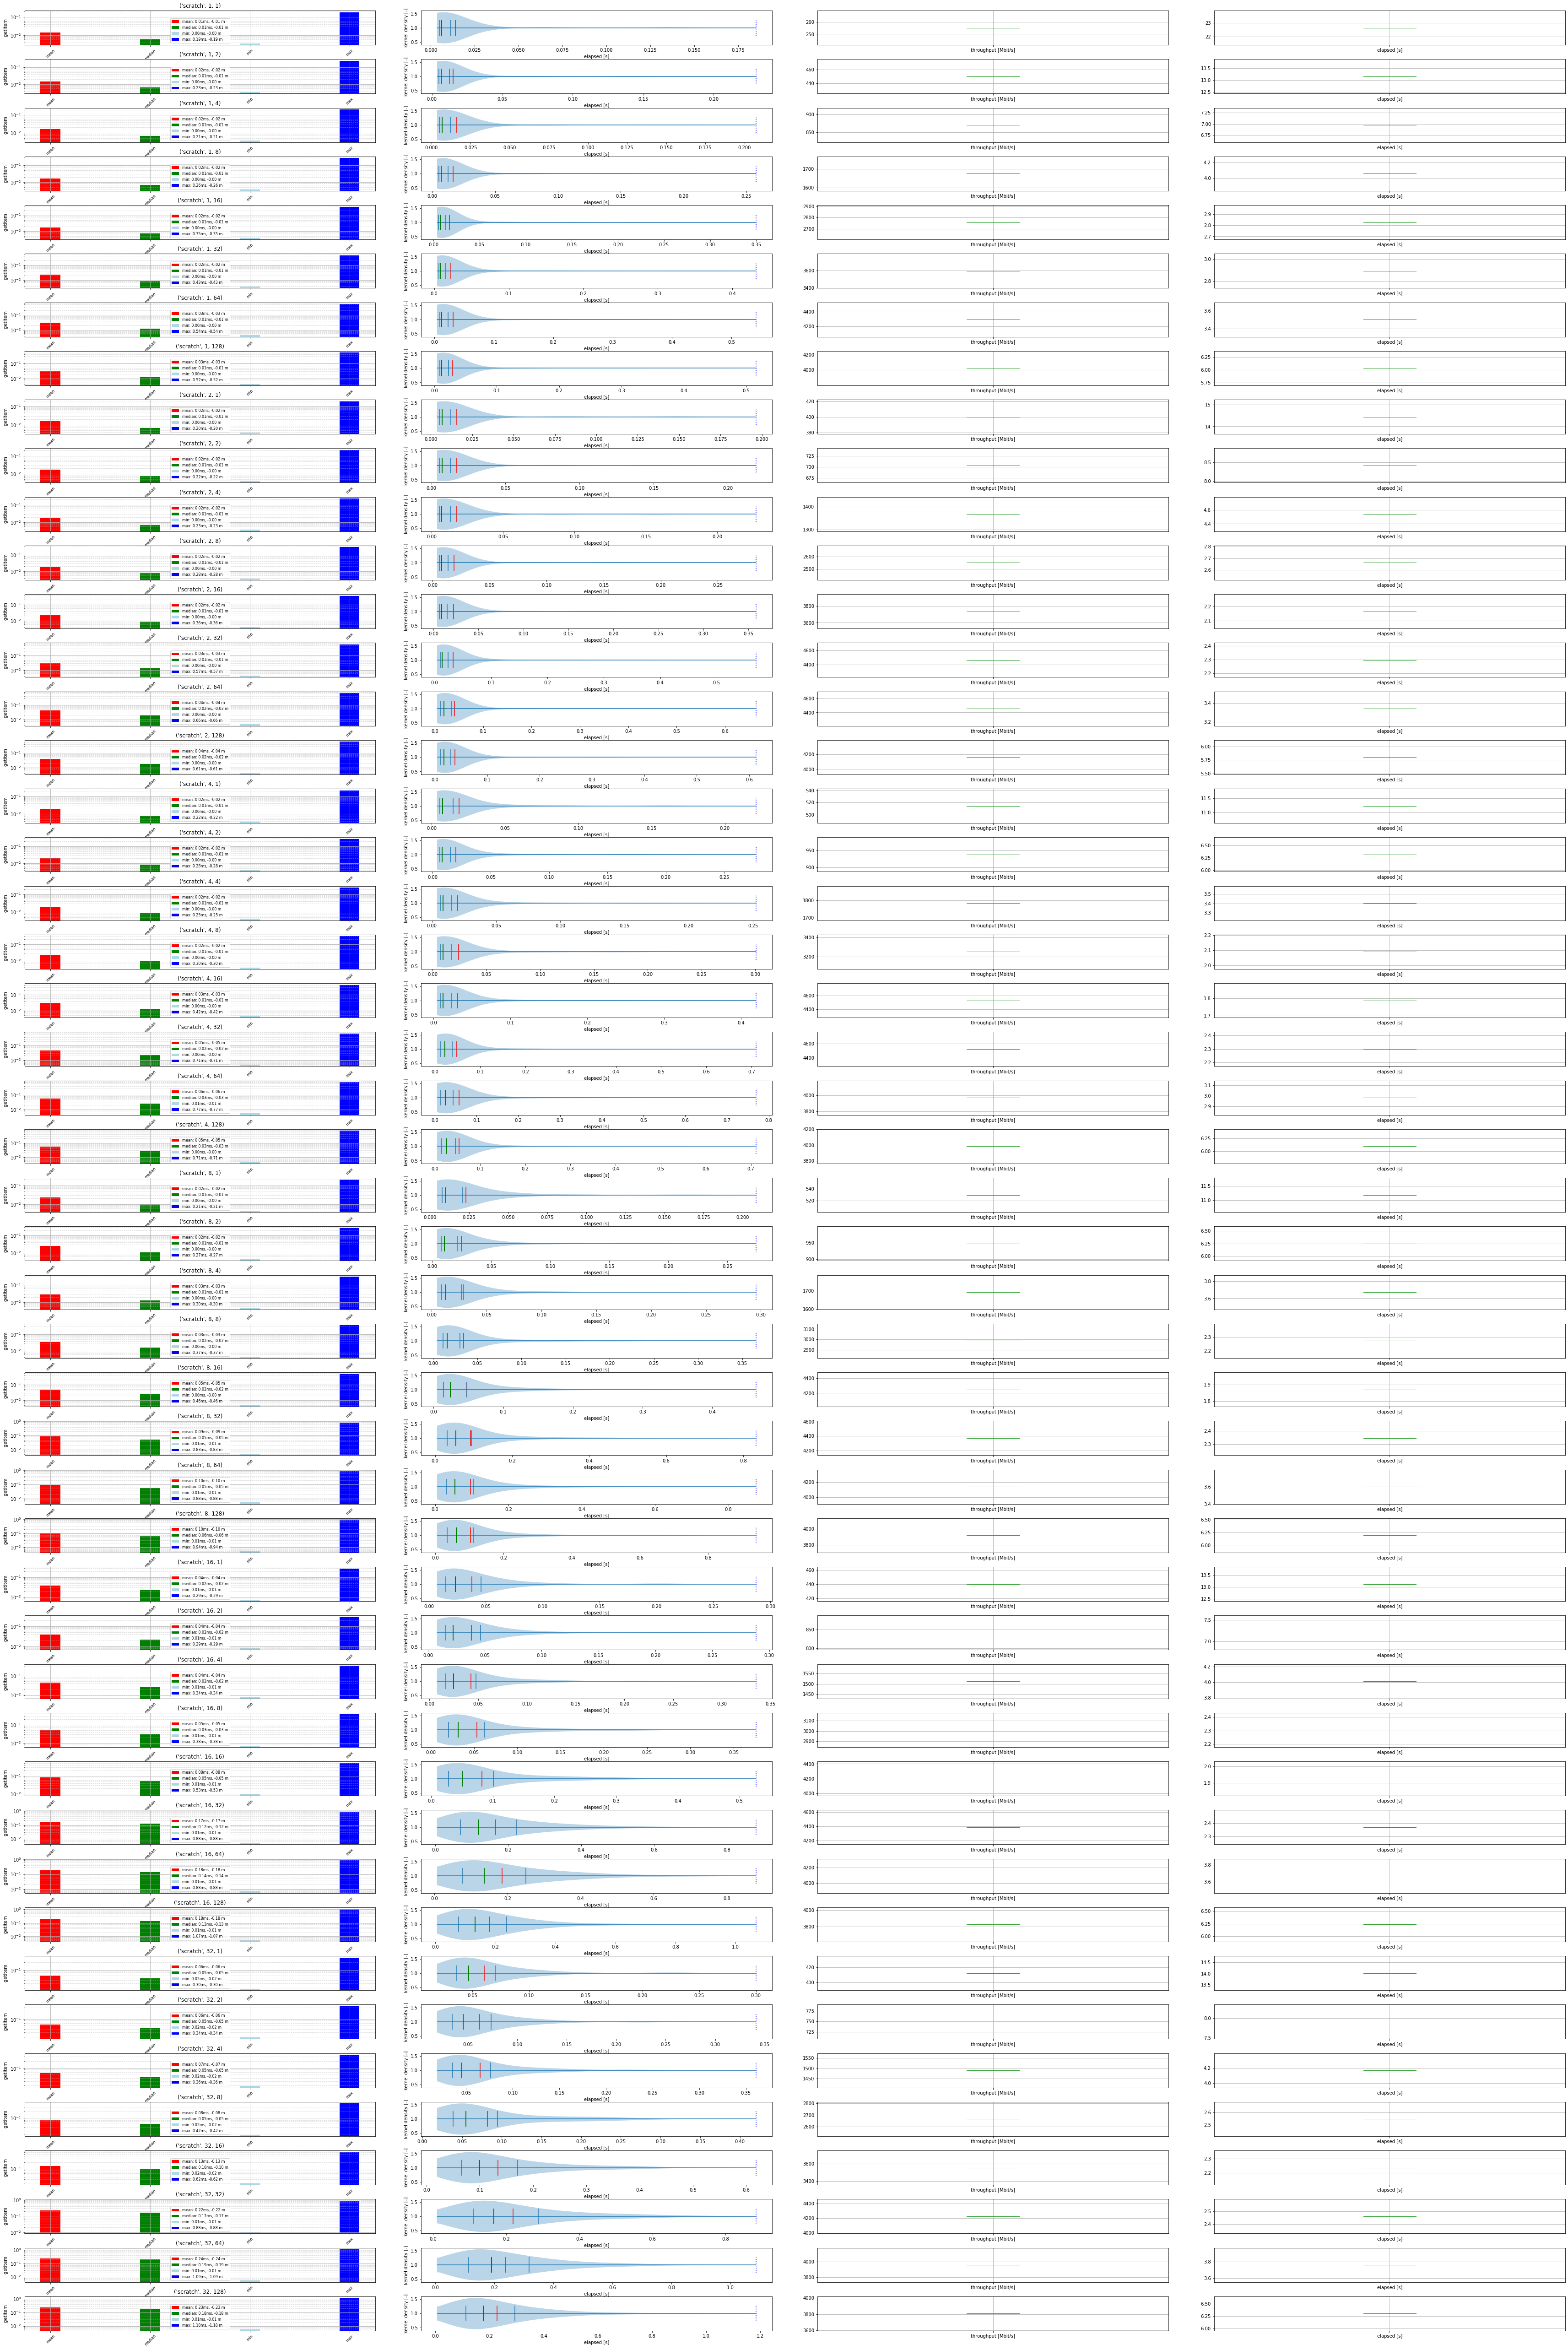

In [10]:
plot_all(s3_dataset, "__getitem__", plot_max=True, log_scale=True, figsize = (50, 80), group_by=group_by_dataloader)
plot_all(scratch_dataset, "__getitem__", plot_max=True, log_scale=True, figsize = (50, 80), group_by=group_by_dataloader)

In [11]:
pd.options.mode.chained_assignment = None  # default='warn'

def plot_throughput_per_storage2(df, group_by: List[str]):
    collected = {}

    x_label = group_by[1]

    df_for_function_name = df[df["function_name"] == "__getitem__"]
    request_time = df_for_function_name["time_end"] - df_for_function_name["time_start"]
    df_for_function_name["request_time"] = request_time
    
    nodes = set(df_for_function_name["node"].drop_duplicates().tolist())
    df_grouped_by_run = df_for_function_name.groupby(["run"]).agg(
        {"time_start": "min", "time_end": "max", "len": "sum", **{k: "first" for k in group_by}}
    )
    runtime = df_grouped_by_run["time_end"] - df_grouped_by_run["time_start"]
    df_grouped_by_run["runtime"] = runtime
    throughput = df_grouped_by_run["len"] / df_grouped_by_run["runtime"] / 8 * 1e6
    df_grouped_by_run["throughput [Mbit/s]"] = throughput

    # sum of all runtimes and all downloaded data by summer over runs
    df_aggregated_over_runs = df_grouped_by_run.groupby(group_by).agg(
        **{
            "len": ("len", "sum"),
            "runtime": ("runtime", "sum"),
            "min_throughput": ("throughput [Mbit/s]", "min"),
            "max_throughput": ("throughput [Mbit/s]", "max"),
            **{k: (k, "first") for k in group_by},
        }
    )

    # https://en.wikipedia.org/wiki/Data-rate_units#Megabit_per_second
    df_aggregated_over_runs["throughput [Mbit/s]"] = (
        df_aggregated_over_runs["len"] / df_aggregated_over_runs["runtime"] / 8 * 1e6
    )
    df_aggregated_over_runs["min_throughput"] = df_aggregated_over_runs["min_throughput"]

    # all requests from all data
    df_aggregated_over_requests = df_for_function_name.groupby(group_by).agg(
        **{
            "min_request_time": ("request_time", "min"),
            "max_request_time": ("request_time", "max"),
            "median_request_time": ("request_time", "median"),
            "mean_request_time": ("request_time", "mean"),
            **{k: (k, "first") for k in group_by},
        }
    )

    fig, ax1 = plt.subplots(figsize=(50, 10))
    ax1.set_ylim([0, max(200, df_grouped_by_run["throughput [Mbit/s]"].max())])
    ax2 = ax1.twinx()
    cmap = plt.cm.get_cmap("Set1")

    result = []
    
    # TODO loop over groups instead
    for i, dataset in enumerate(["s3", "scratch"]):
        df = df_aggregated_over_runs[df_aggregated_over_runs["dataset"] == dataset]

        storage = dataset

        ax1.plot(
            df[x_label],
            df["throughput [Mbit/s]"],
            linewidth=4,
            color=cmap(i),
            label=f"{storage} throughput over all runs, min/max hull per run",
        )
        ax1.fill_between(
            df[x_label], df["min_throughput"], df["max_throughput"], color=lighten_color(cmap(i), 0.2), alpha=0.5
        )
        ax1.set_xticks(df[x_label])

        df2 = df_aggregated_over_requests[df_aggregated_over_requests["dataset"] == dataset]
        ax2.plot(
            df2[x_label],
            df2["median_request_time"],
            linewidth=4,
            color=cmap(i),
            label=f"{storage} request_time",
            linestyle="dashed",
        )
        # result.append({str(dataset): [df["throughput [Mbit/s]"], df2["median_request_time"]]})
        result.append({"dataset": dataset, "throughput": df["throughput [Mbit/s]"], "median_request_time": df2["median_request_time"]})

    fig.legend(handlelength=5)

    ax1.set_ylabel("throughput [Mbit/s]")
    ax1.set_xlabel(f"{x_label} [#processes]")
    ax1.set_title(f"Storage benchmarking {nodes} {list(collected.keys())}")
    ax2.set_ylabel("Request time [s]")
    return result

In [12]:
pd.options.mode.chained_assignment = None  # default='warn'

def plot_throughput_per_storage_single(df, group_by: List[str], dataset):
    collected = {}

    x_label = group_by[1]

    df_for_function_name = df[df["function_name"] == "__getitem__"]
    request_time = df_for_function_name["time_end"] - df_for_function_name["time_start"]
    df_for_function_name["request_time"] = request_time
    
    nodes = set(df_for_function_name["node"].drop_duplicates().tolist())
    df_grouped_by_run = df_for_function_name.groupby(["run"]).agg(
        {"time_start": "min", "time_end": "max", "len": "sum", **{k: "first" for k in group_by}}
    )
    runtime = df_grouped_by_run["time_end"] - df_grouped_by_run["time_start"]
    df_grouped_by_run["runtime"] = runtime
#     print(f"LEN: {df_grouped_by_run['len']}, RT: {runtime}")
    throughput = df_grouped_by_run["len"] / df_grouped_by_run["runtime"] / 8 * 1e6
    df_grouped_by_run["throughput [Mbit/s]"] = throughput
    print(throughput)

    # sum of all runtimes and all downloaded data by summer over runs
    df_aggregated_over_runs = df_grouped_by_run.groupby(group_by).agg(
        **{
            "len": ("len", "sum"),
            "runtime": ("runtime", "sum"),
            "min_throughput": ("throughput [Mbit/s]", "min"),
            "max_throughput": ("throughput [Mbit/s]", "max"),
            **{k: (k, "first") for k in group_by},
        }
    )

    # https://en.wikipedia.org/wiki/Data-rate_units#Megabit_per_second
    df_aggregated_over_runs["throughput [Mbit/s]"] = (
        df_aggregated_over_runs["len"] / df_aggregated_over_runs["runtime"] / 8 * 1e6
    )
    df_aggregated_over_runs["min_throughput"] = df_aggregated_over_runs["min_throughput"]

    # all requests from all data
    df_aggregated_over_requests = df_for_function_name.groupby(group_by).agg(
        **{
            "min_request_time": ("request_time", "min"),
            "max_request_time": ("request_time", "max"),
            "median_request_time": ("request_time", "median"),
            "mean_request_time": ("request_time", "mean"),
            **{k: (k, "first") for k in group_by},
        }
    )

    fig, ax1 = plt.subplots(figsize=(50, 10))
    ax1.set_ylim([0, max(200, df_grouped_by_run["throughput [Mbit/s]"].max())])
    ax2 = ax1.twinx()
    cmap = plt.cm.get_cmap("Set1")

    result = []
    
    # TODO loop over groups instead
    df = df_aggregated_over_runs[df_aggregated_over_runs["dataset"] == dataset]

    storage = dataset

    i = 0
    ax1.plot(
        df[x_label],
        df["throughput [Mbit/s]"],
        linewidth=4,
        color=cmap(i),
        label=f"{storage} throughput over all runs, min/max hull per run",
    )
    ax1.fill_between(
        df[x_label], df["min_throughput"], df["max_throughput"], color=lighten_color(cmap(i), 0.2), alpha=0.5
    )
    ax1.set_xticks(df[x_label])

    df2 = df_aggregated_over_requests[df_aggregated_over_requests["dataset"] == dataset]
    ax2.plot(
        df2[x_label],
        df2["median_request_time"],
        linewidth=4,
        color=cmap(i),
        label=f"{storage} request_time",
        linestyle="dashed",
    )
    # result.append({str(dataset): [df["throughput [Mbit/s]"], df2["median_request_time"]]})
    result.append({"dataset": dataset, "throughput": df["throughput [Mbit/s]"], "median_request_time": df2["median_request_time"]})

    fig.legend(handlelength=5)

    ax1.set_ylabel("throughput [Mbit/s]")
    ax1.set_xlabel(f"{x_label} [#processes]")
    ax1.set_title(f"Storage benchmarking {nodes} {list(collected.keys())}")
    ax2.set_ylabel("Request time [s]")
    return result

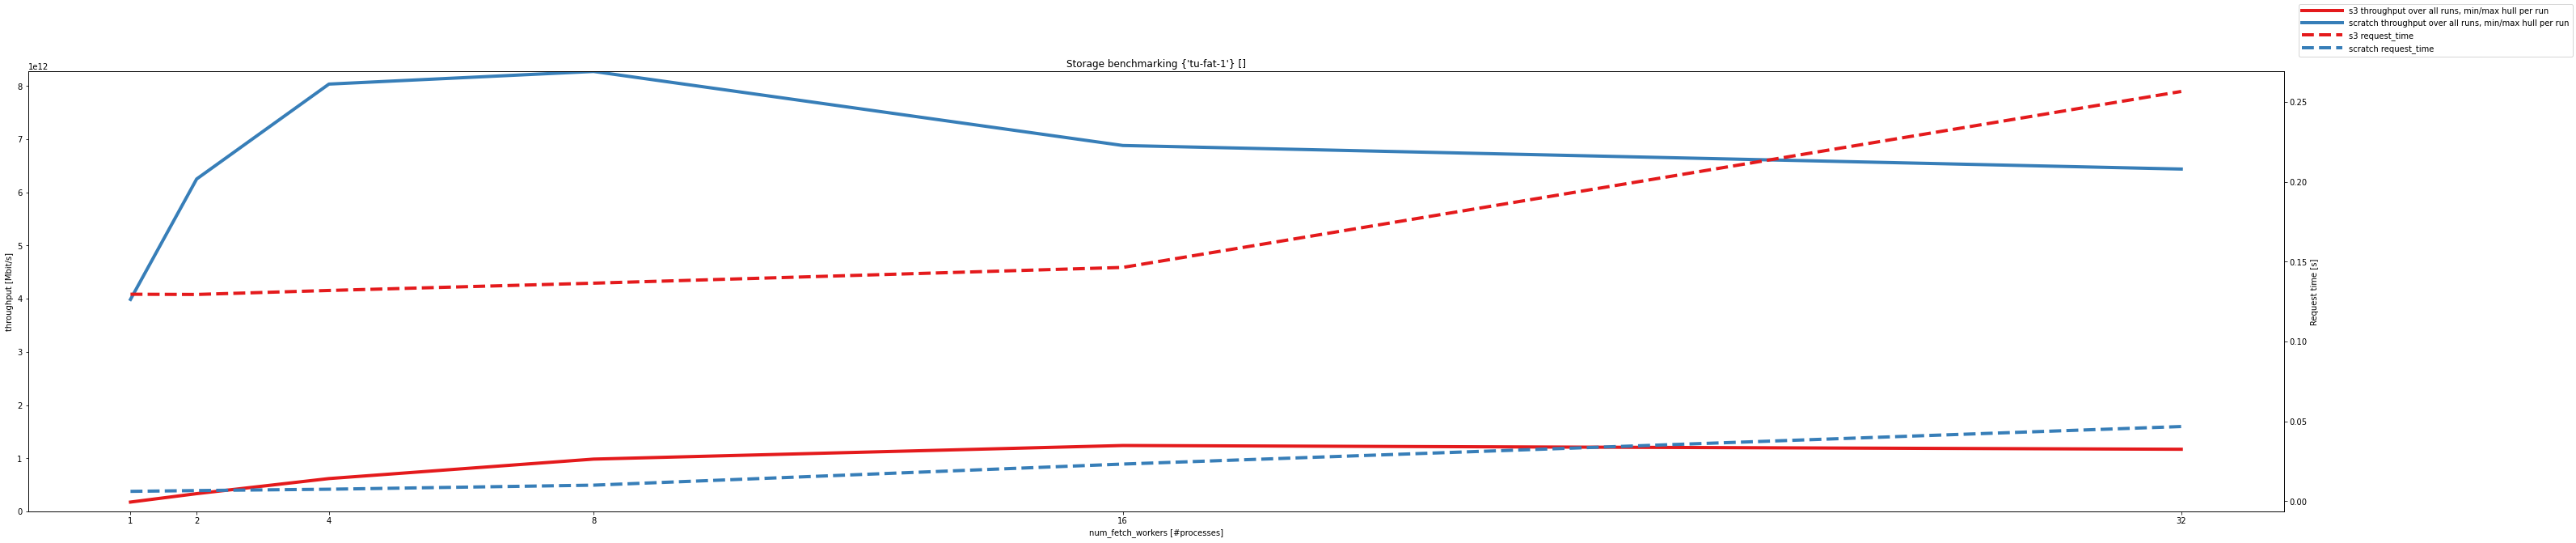

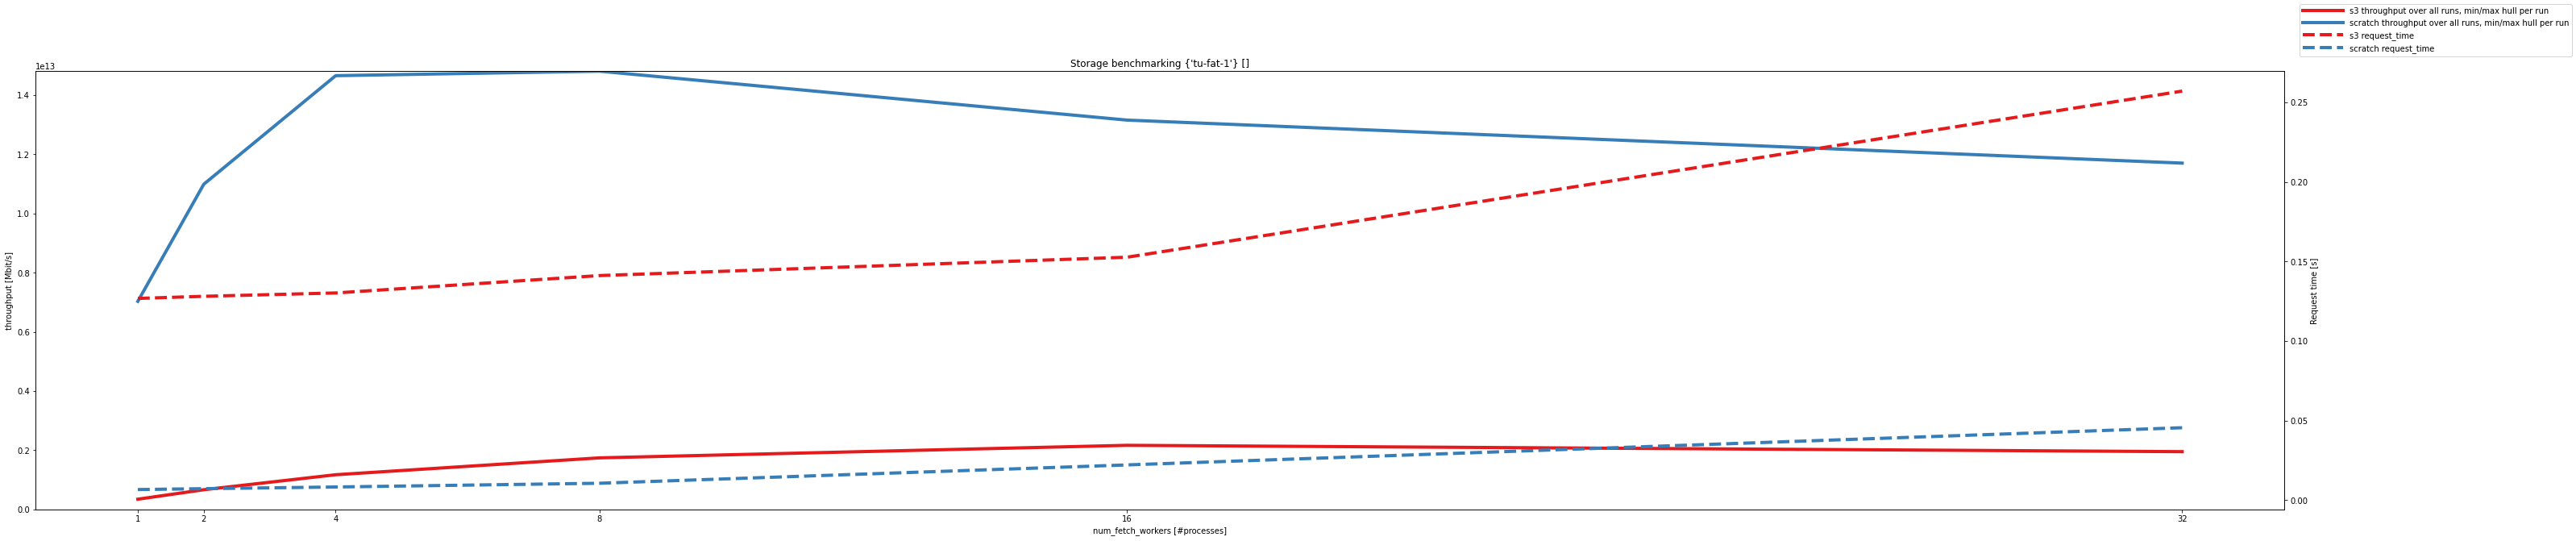

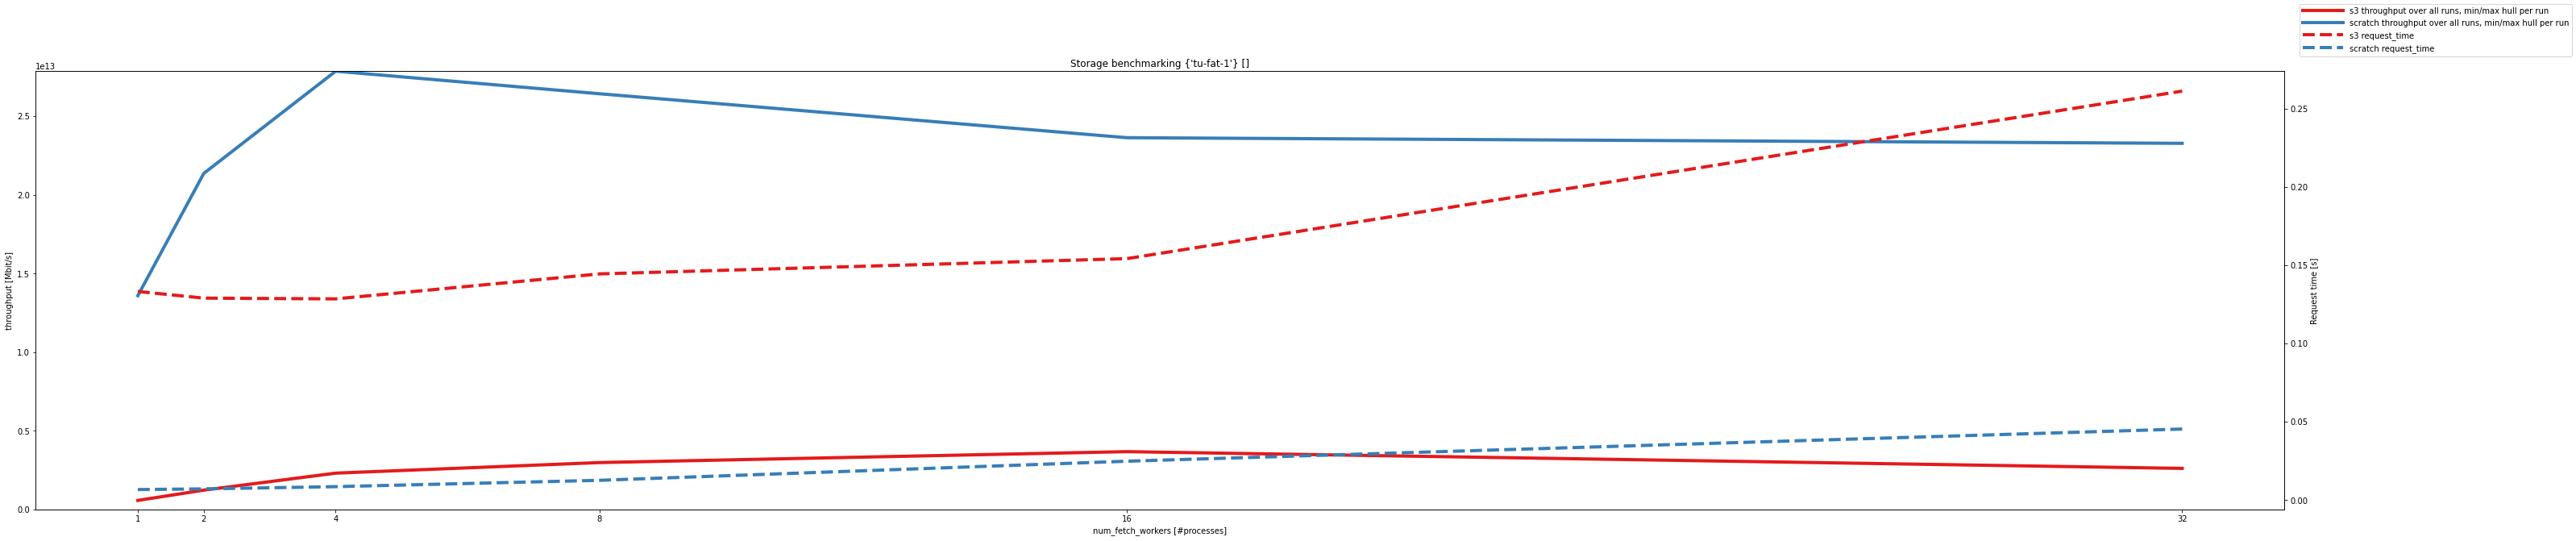

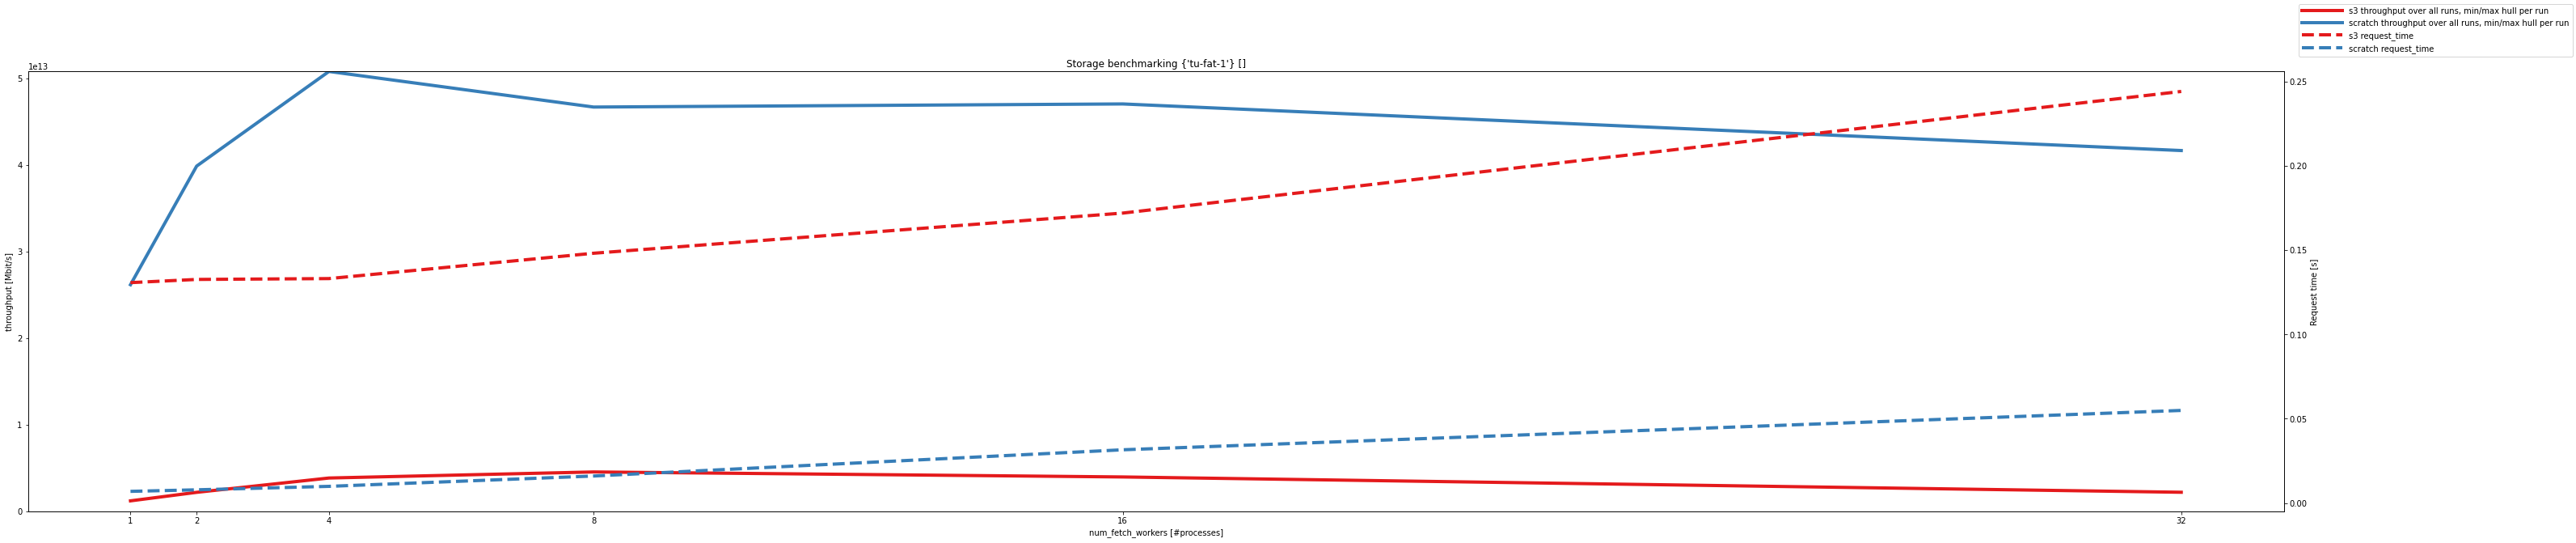

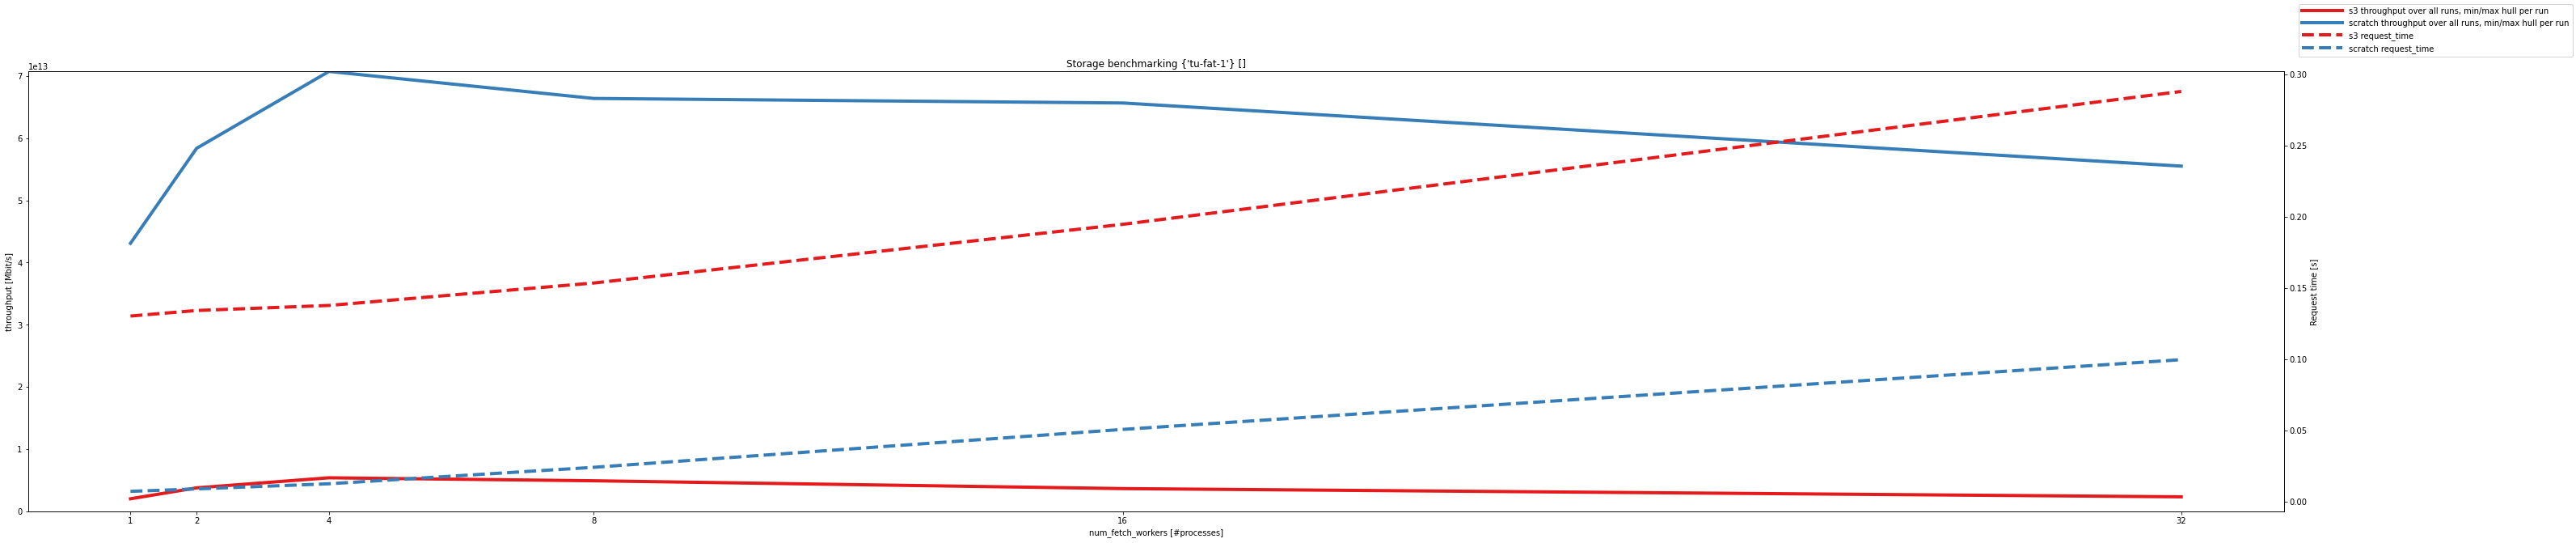

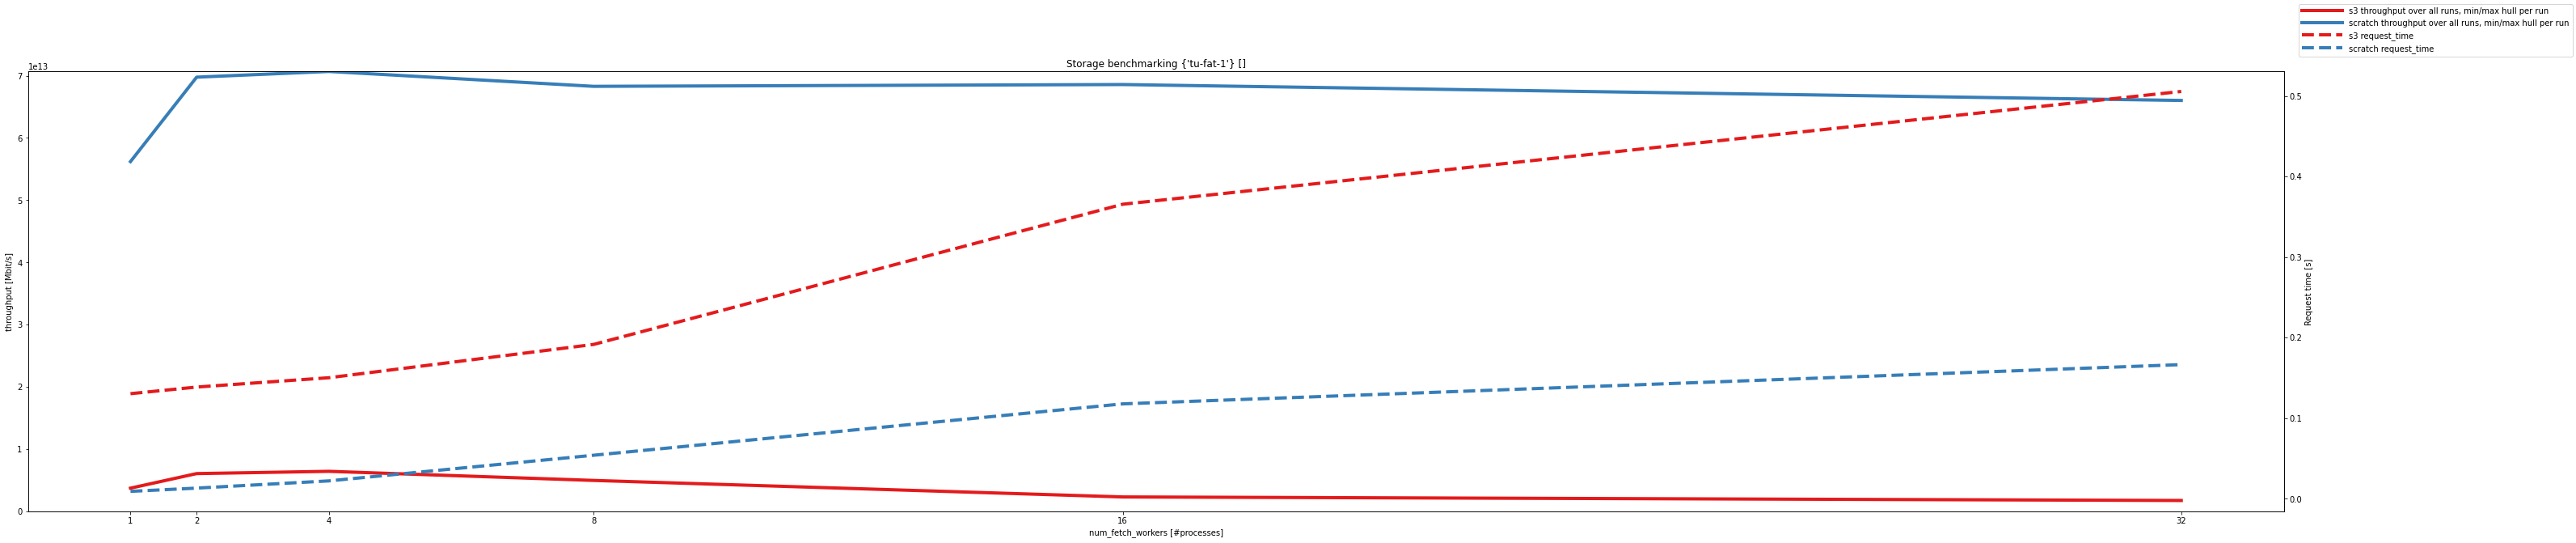

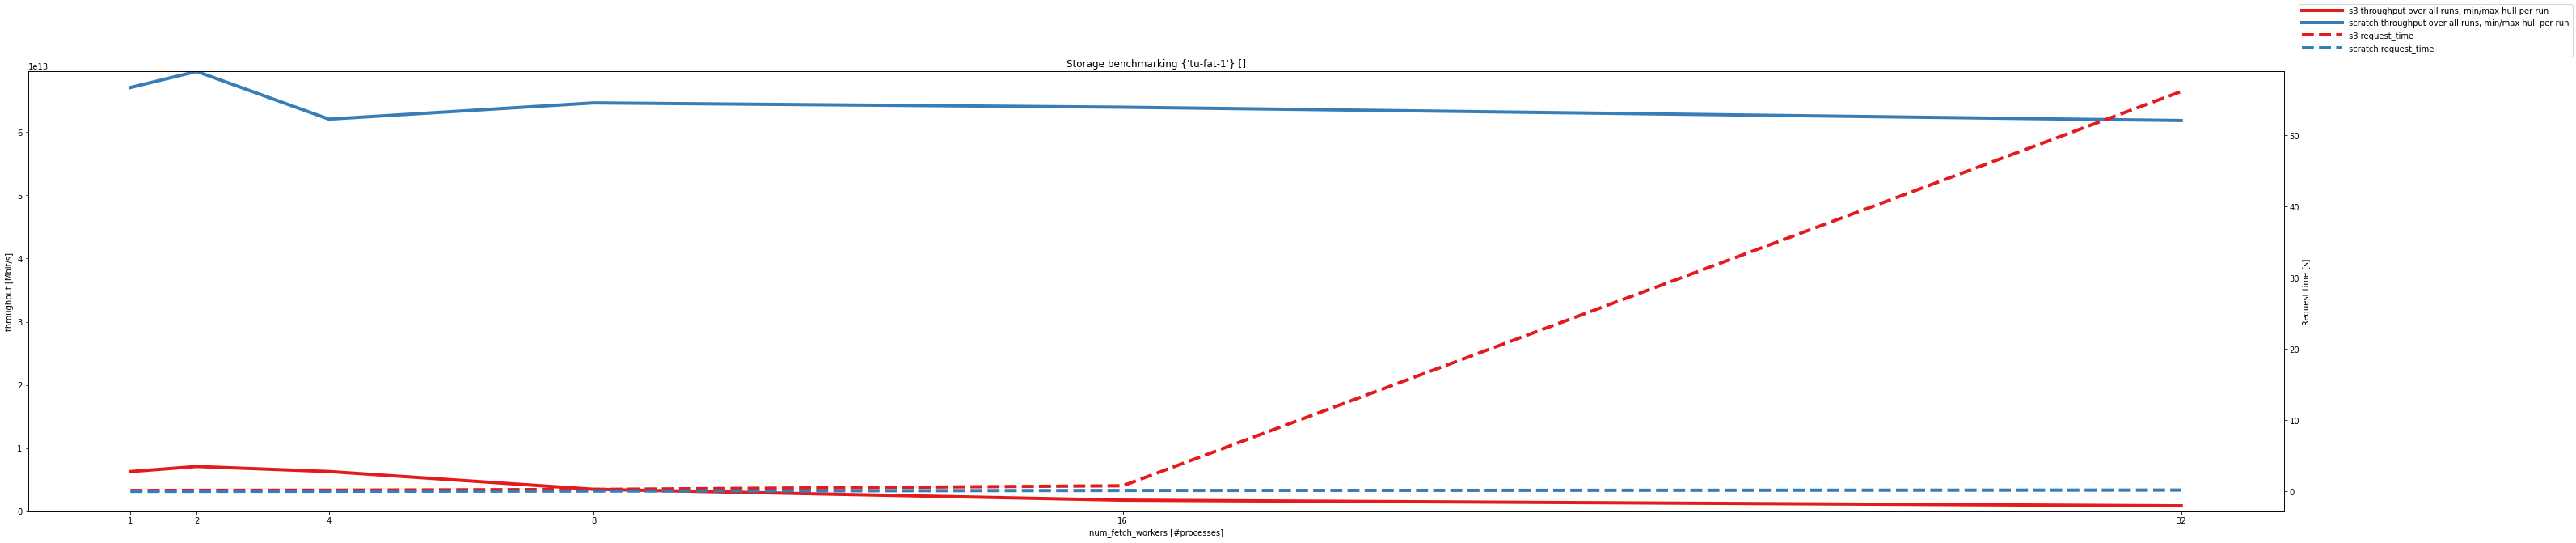

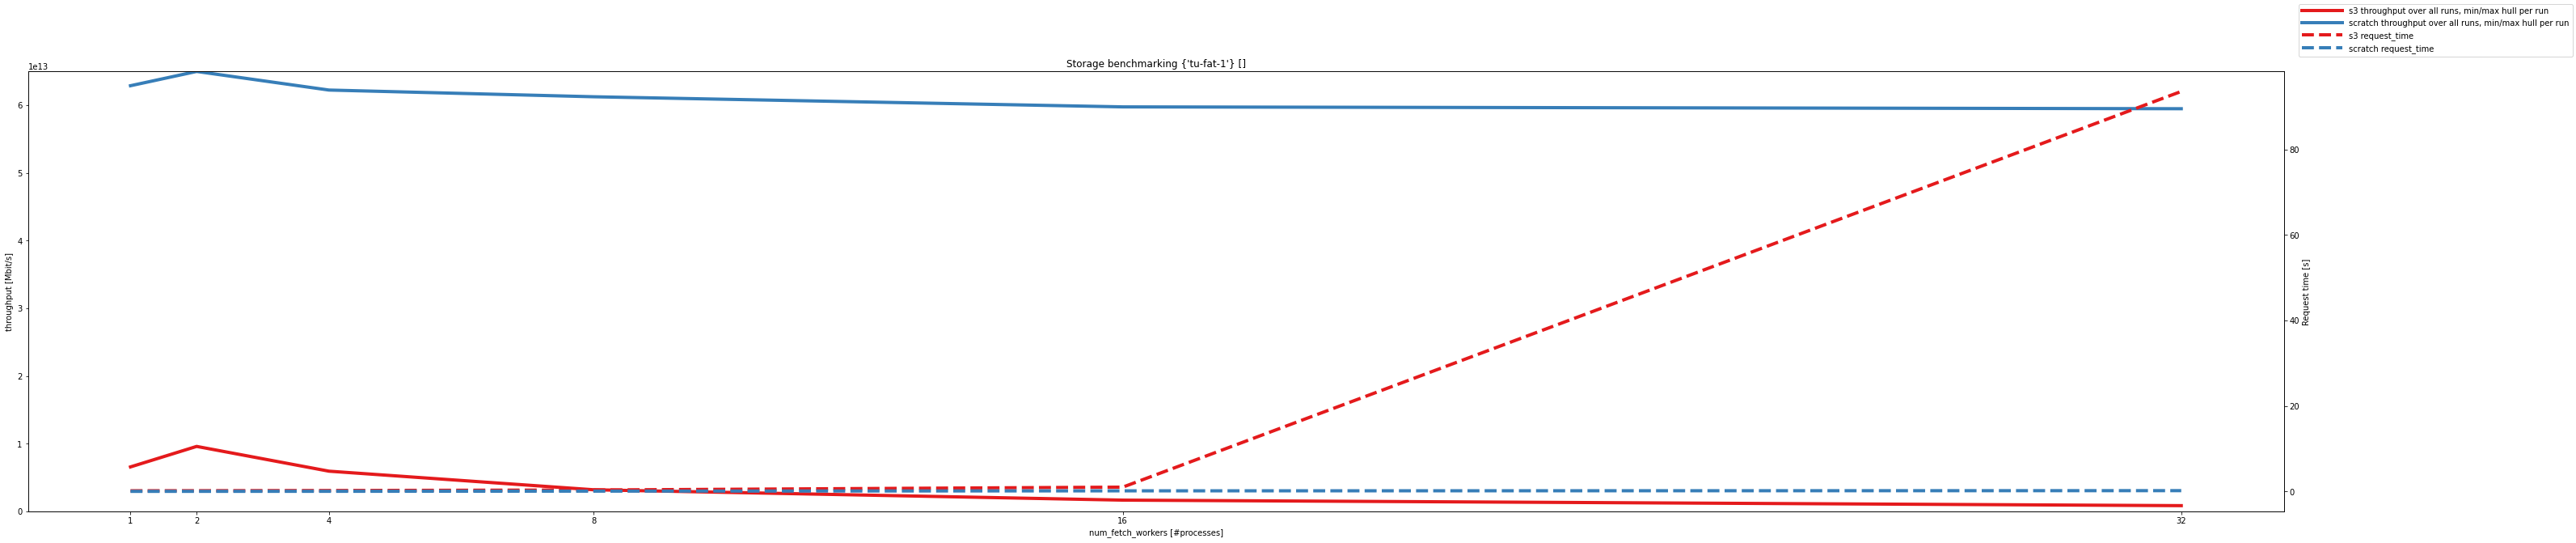

In [13]:
results_all = []
for i in [1, 2, 4, 8, 16, 32, 64, 128]:
    dfdl=df_dataloader[df_dataloader["num_workers"]==i]
    r = plot_throughput_per_storage2(dfdl, group_by_dataloader)
    results_all.append(r)
#     print(r)

run
20211215f132420_benchmark_dataloader_s3_32_1_1_sync     1.747060e+11
20211215f133158_benchmark_dataloader_s3_32_1_2_sync     3.329174e+11
20211215f133618_benchmark_dataloader_s3_32_1_4_sync     6.167955e+11
20211215f133911_benchmark_dataloader_s3_32_1_8_sync     9.827564e+11
20211215f134202_benchmark_dataloader_s3_32_1_16_sync    1.238528e+12
20211215f134538_benchmark_dataloader_s3_32_1_32_sync    1.167997e+12
dtype: float64
run
20211215f132729_benchmark_dataloader_s3_32_2_1_sync     3.472040e+11
20211215f133341_benchmark_dataloader_s3_32_2_2_sync     6.671508e+11
20211215f133713_benchmark_dataloader_s3_32_2_4_sync     1.173609e+12
20211215f133947_benchmark_dataloader_s3_32_2_8_sync     1.743685e+12
20211215f134230_benchmark_dataloader_s3_32_2_16_sync    2.167313e+12
20211215f134608_benchmark_dataloader_s3_32_2_32_sync    1.953316e+12
dtype: float64
run
20211215f132905_benchmark_dataloader_s3_32_4_1_sync     5.763391e+11
20211215f133433_benchmark_dataloader_s3_32_4_2_sync     1.228

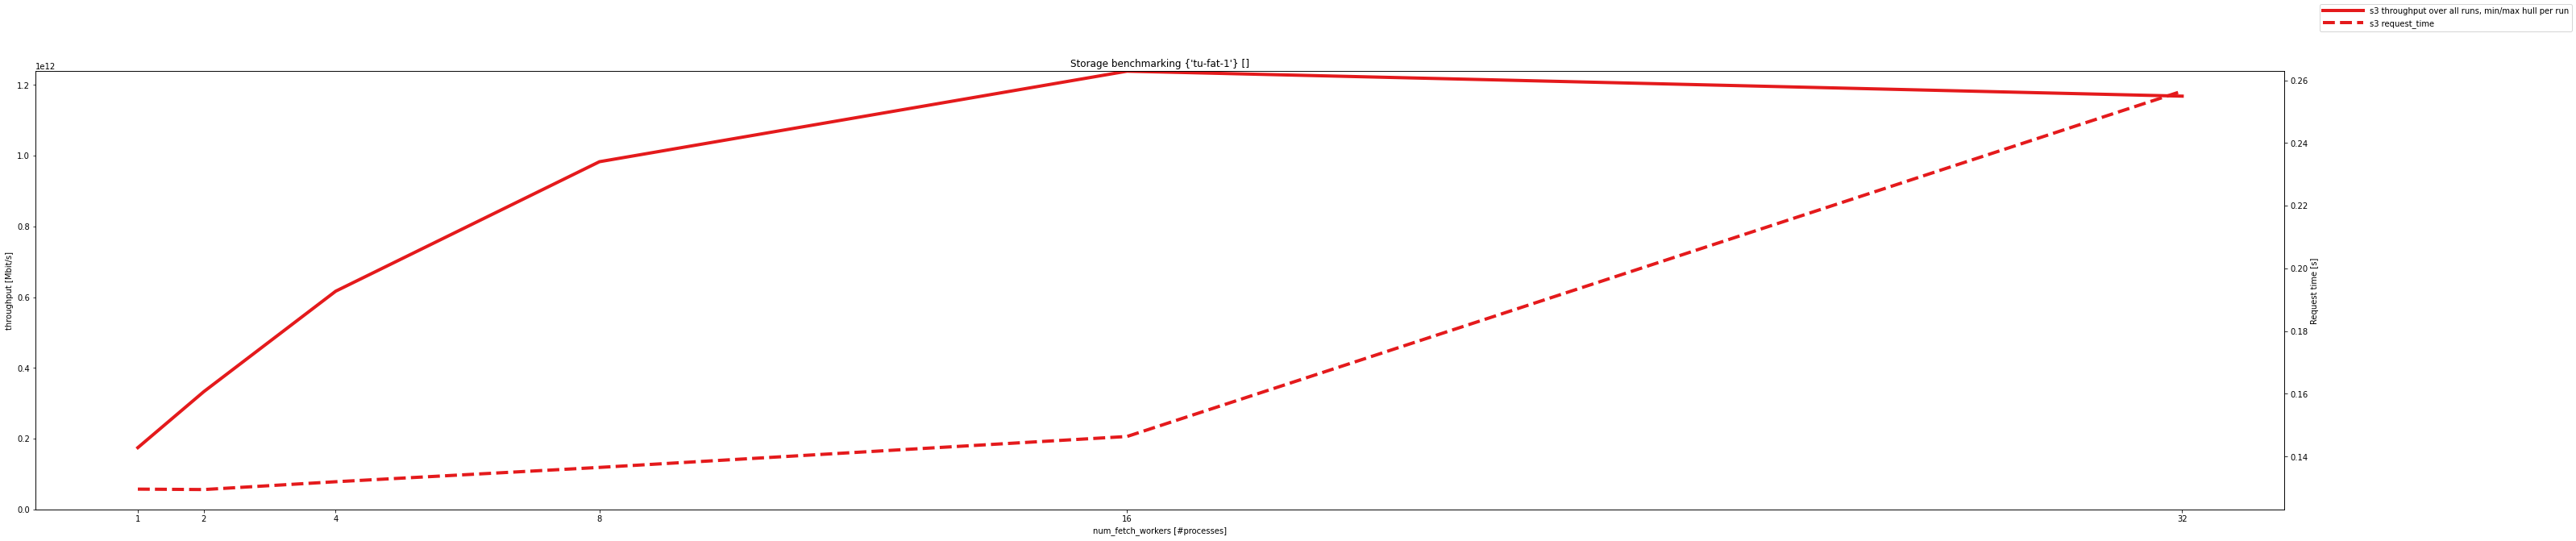

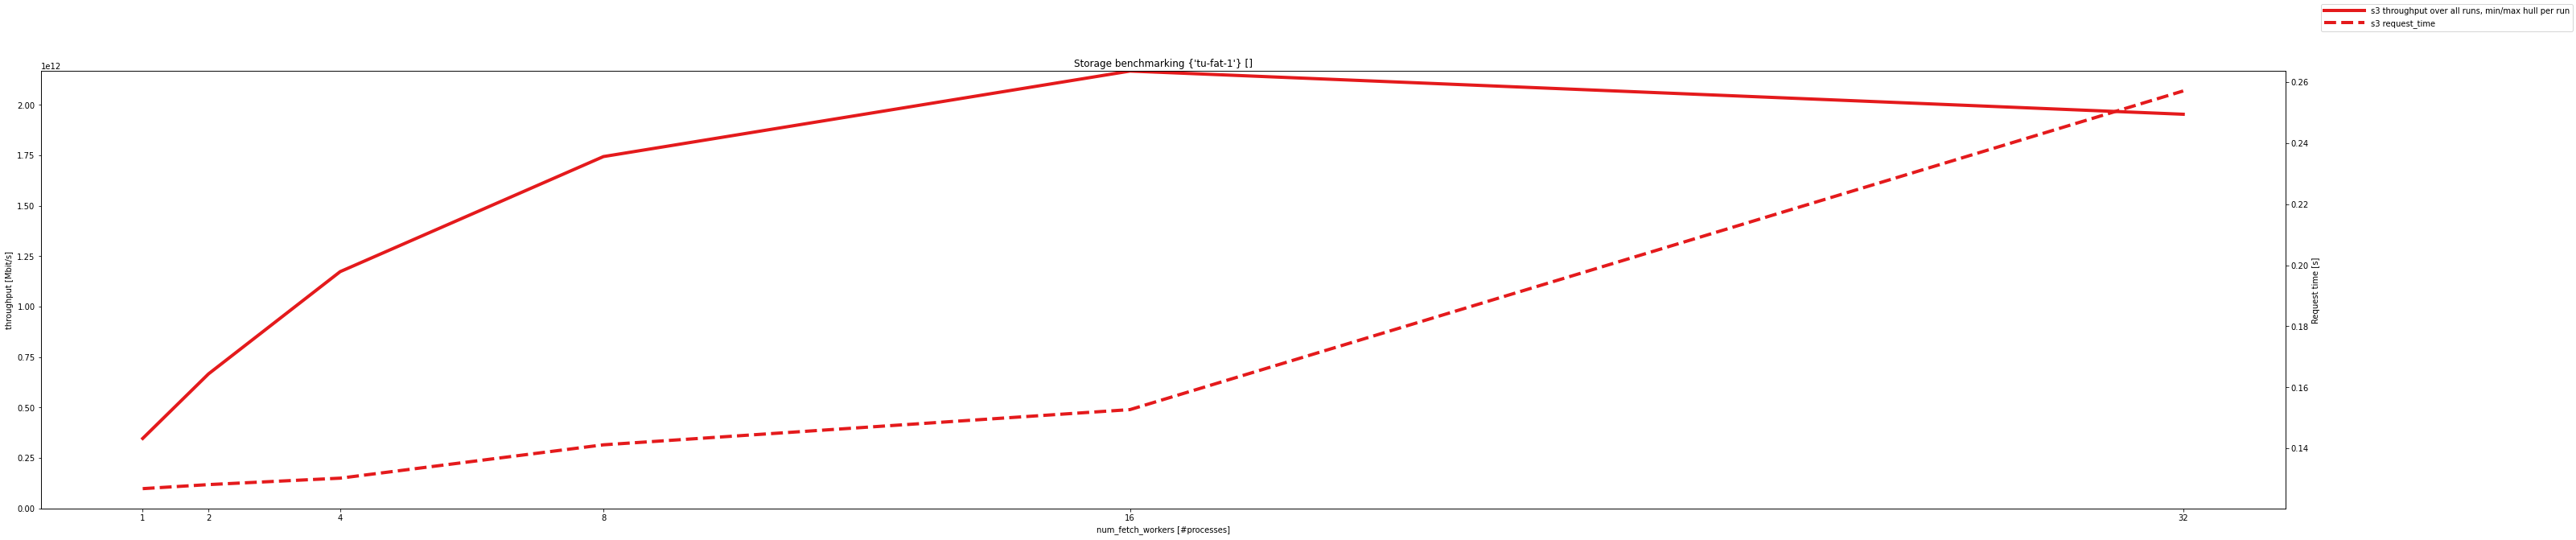

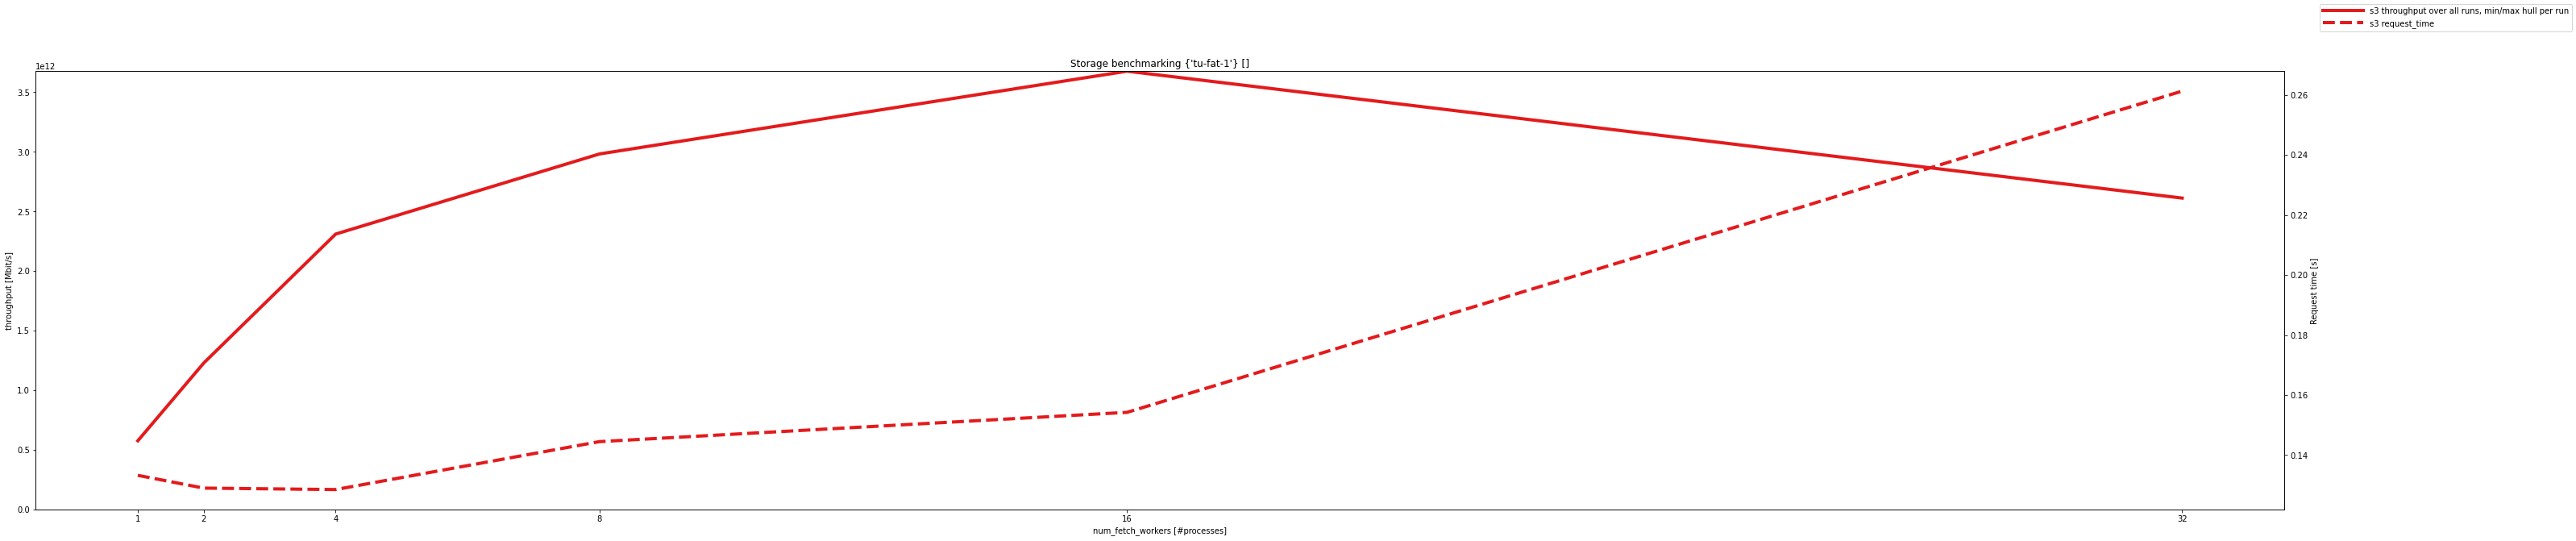

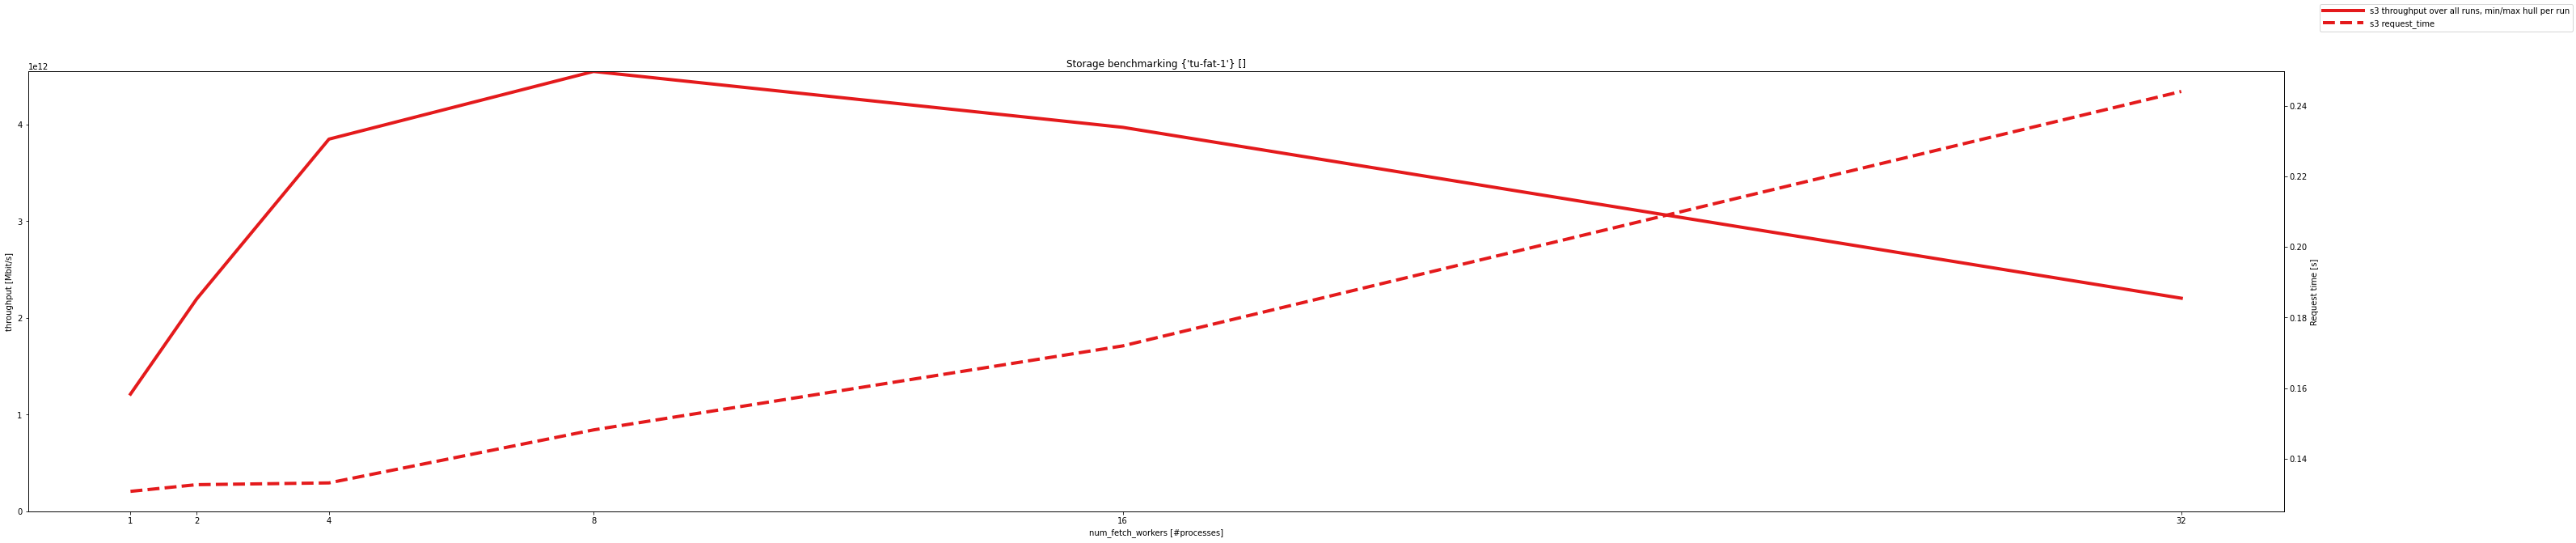

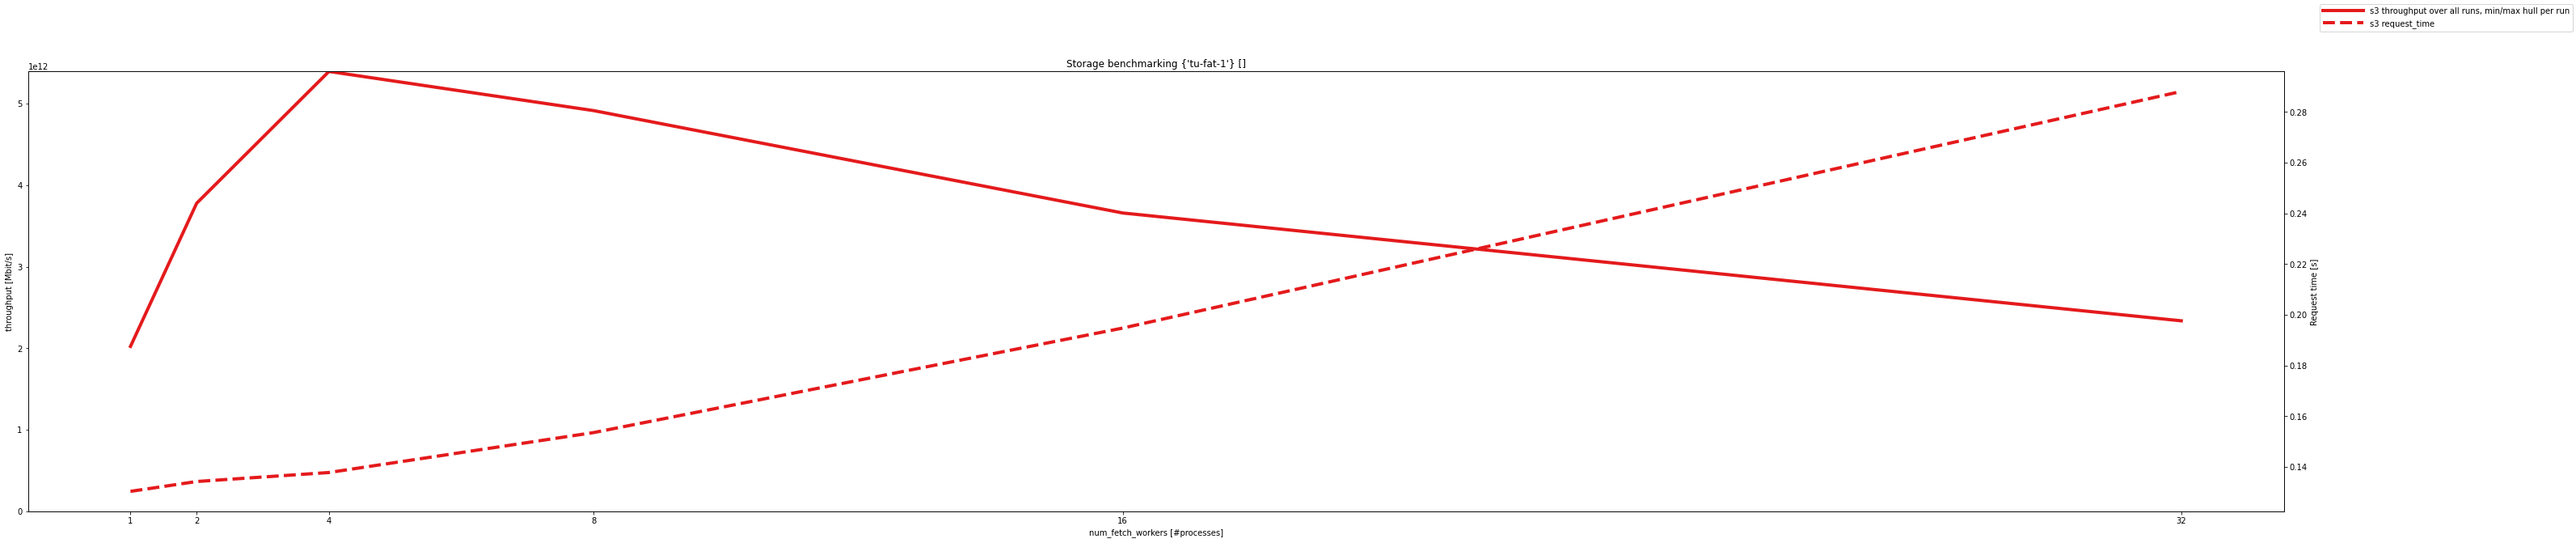

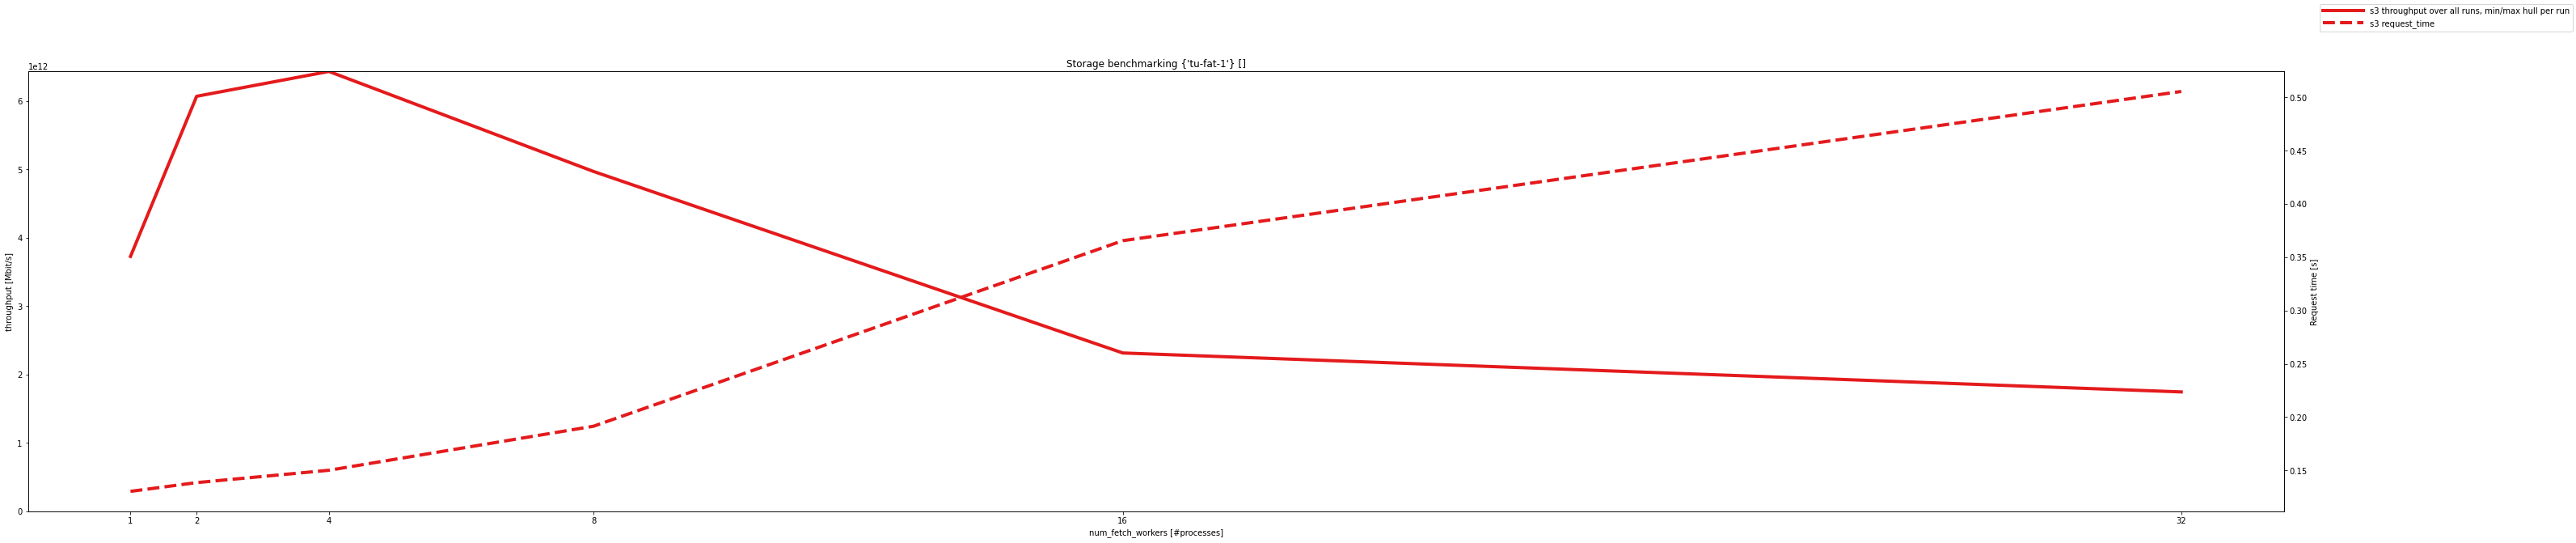

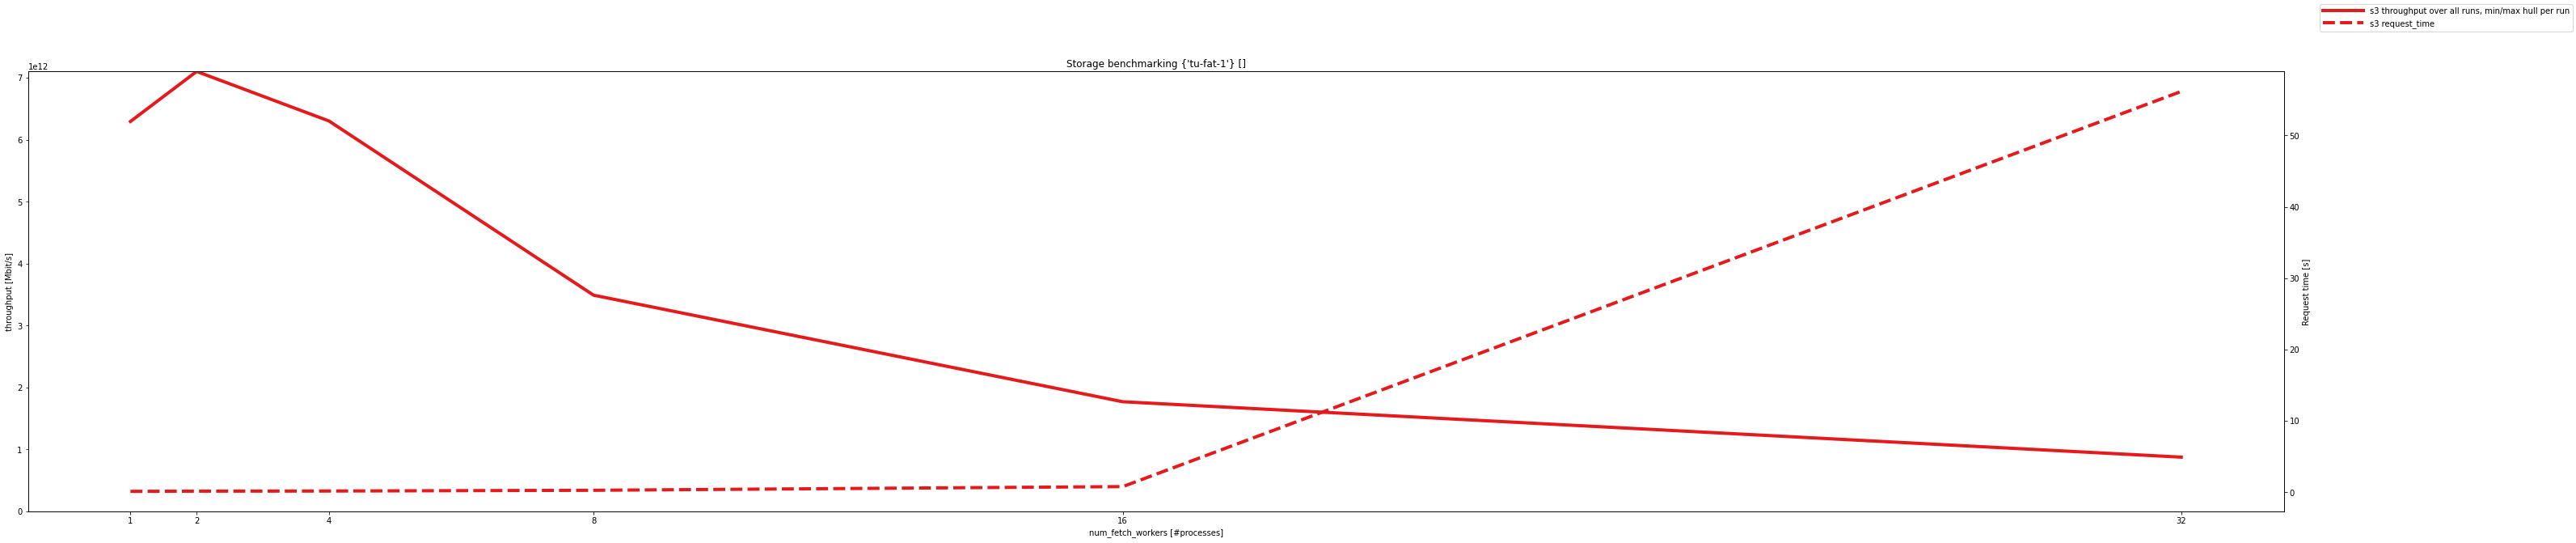

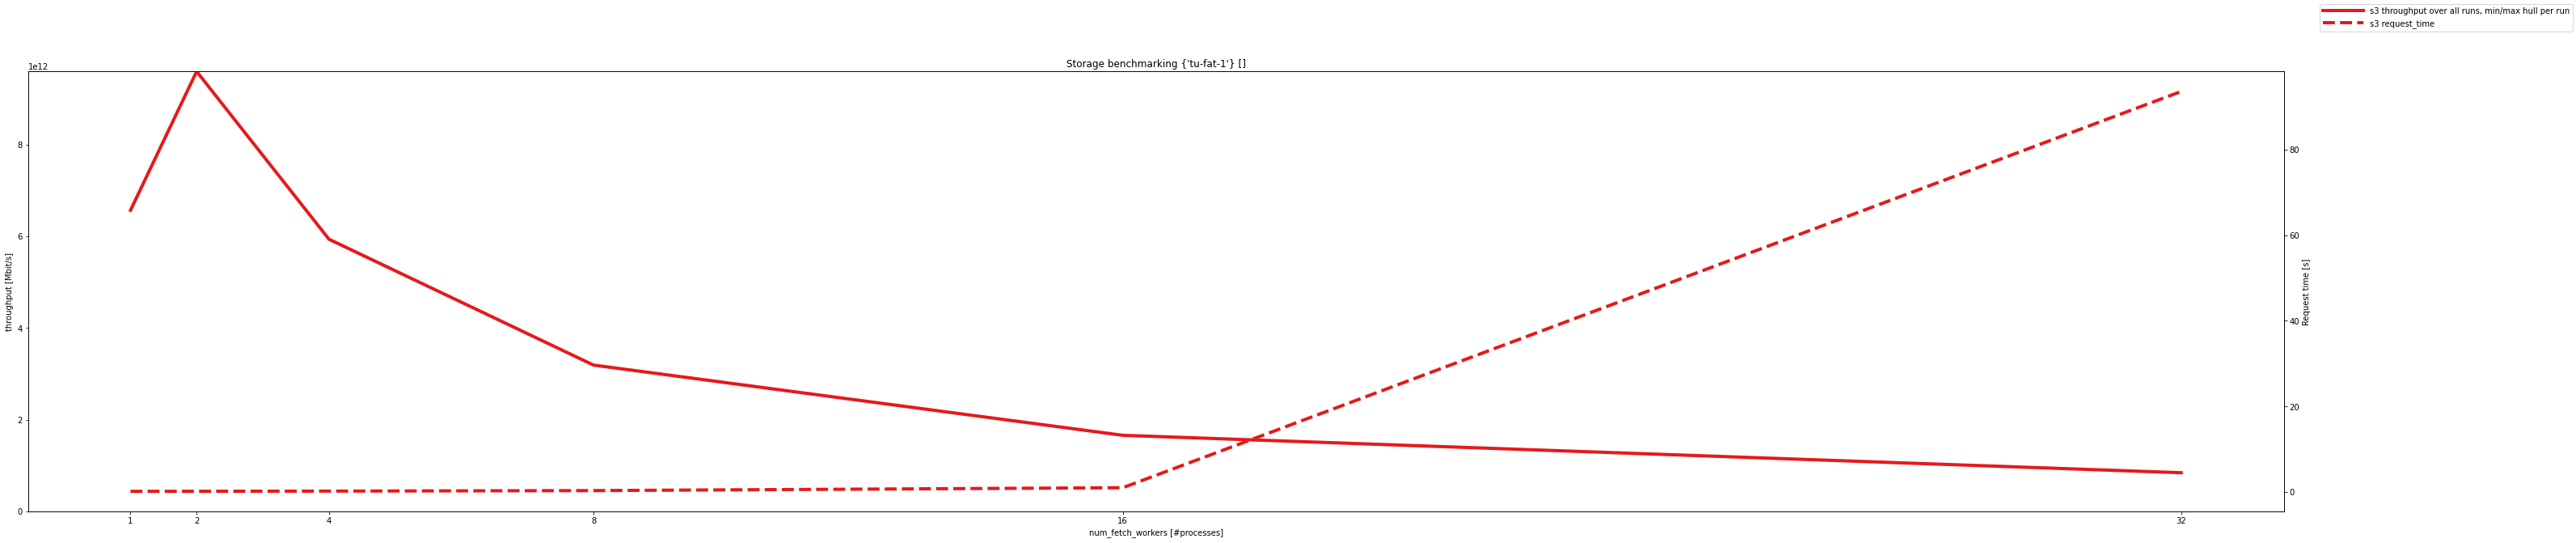

In [14]:
results_s3 = []
for i in [1, 2, 4, 8, 16, 32, 64, 128]:
    dfdl=s3_dataset[s3_dataset["num_workers"]==i]
    r = plot_throughput_per_storage_single(dfdl, group_by_dataloader, dataset="s3")
    results_s3.append(r)
#     print(r)

run
20211215f135116_benchmark_dataloader_scratch_32_1_1_sync     3.986650e+12
20211215f135240_benchmark_dataloader_scratch_32_1_2_sync     6.251296e+12
20211215f135340_benchmark_dataloader_scratch_32_1_4_sync     8.036805e+12
20211215f135433_benchmark_dataloader_scratch_32_1_8_sync     8.274436e+12
20211215f135533_benchmark_dataloader_scratch_32_1_16_sync    6.881782e+12
20211215f135641_benchmark_dataloader_scratch_32_1_32_sync    6.438620e+12
dtype: float64
run
20211215f135140_benchmark_dataloader_scratch_32_2_1_sync     7.031790e+12
20211215f135256_benchmark_dataloader_scratch_32_2_2_sync     1.098961e+13
20211215f135353_benchmark_dataloader_scratch_32_2_4_sync     1.465692e+13
20211215f135447_benchmark_dataloader_scratch_32_2_8_sync     1.480868e+13
20211215f135548_benchmark_dataloader_scratch_32_2_16_sync    1.315617e+13
20211215f135657_benchmark_dataloader_scratch_32_2_32_sync    1.170287e+13
dtype: float64
run
20211215f135156_benchmark_dataloader_scratch_32_4_1_sync     1.359147e

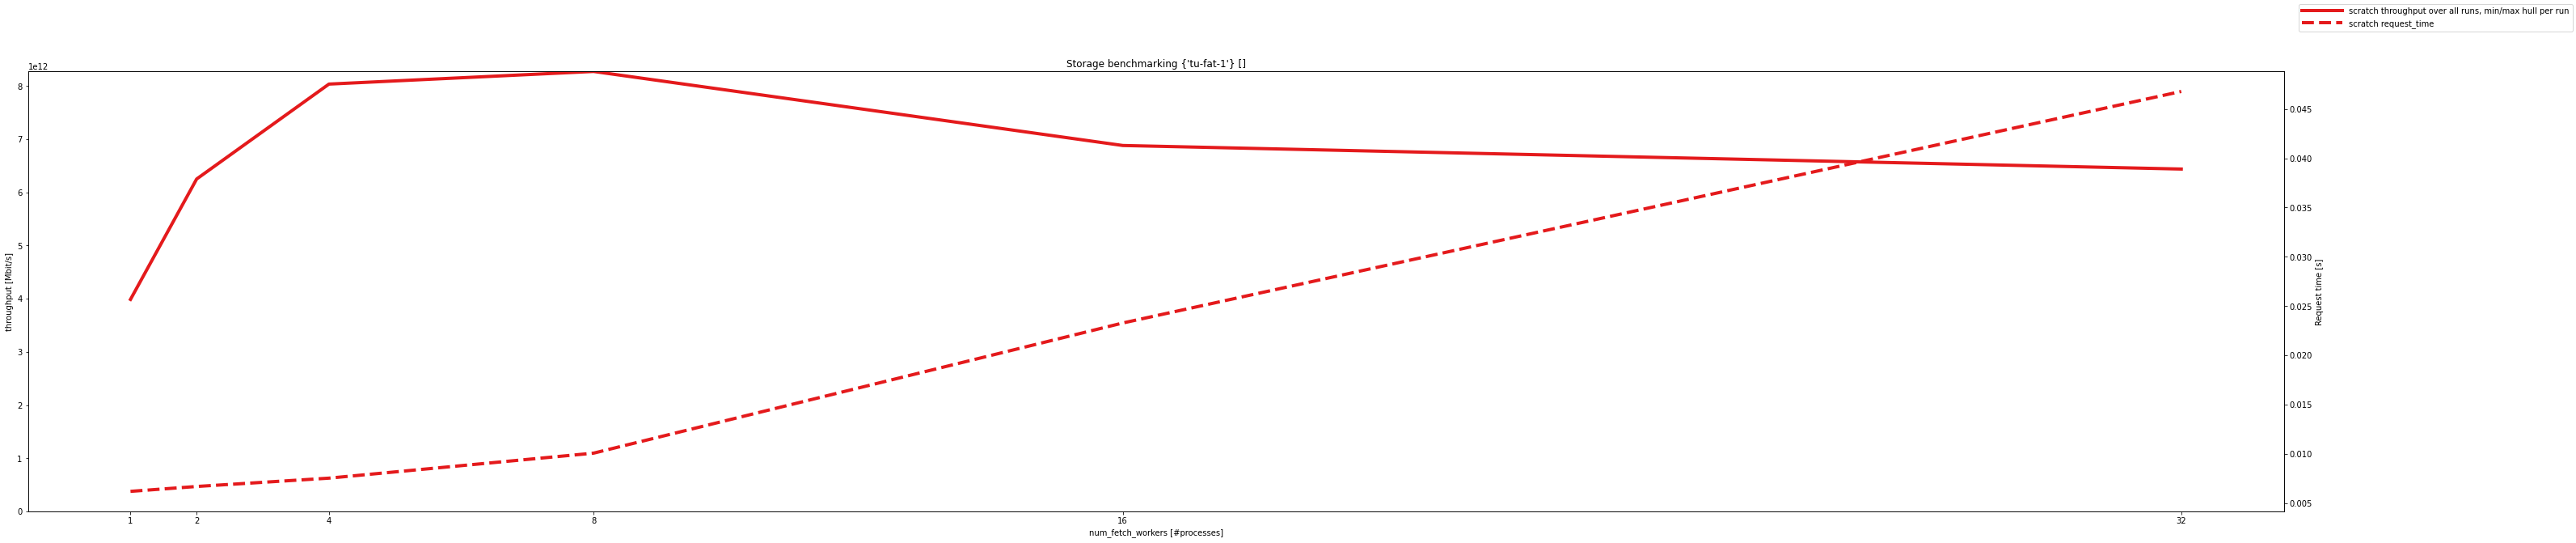

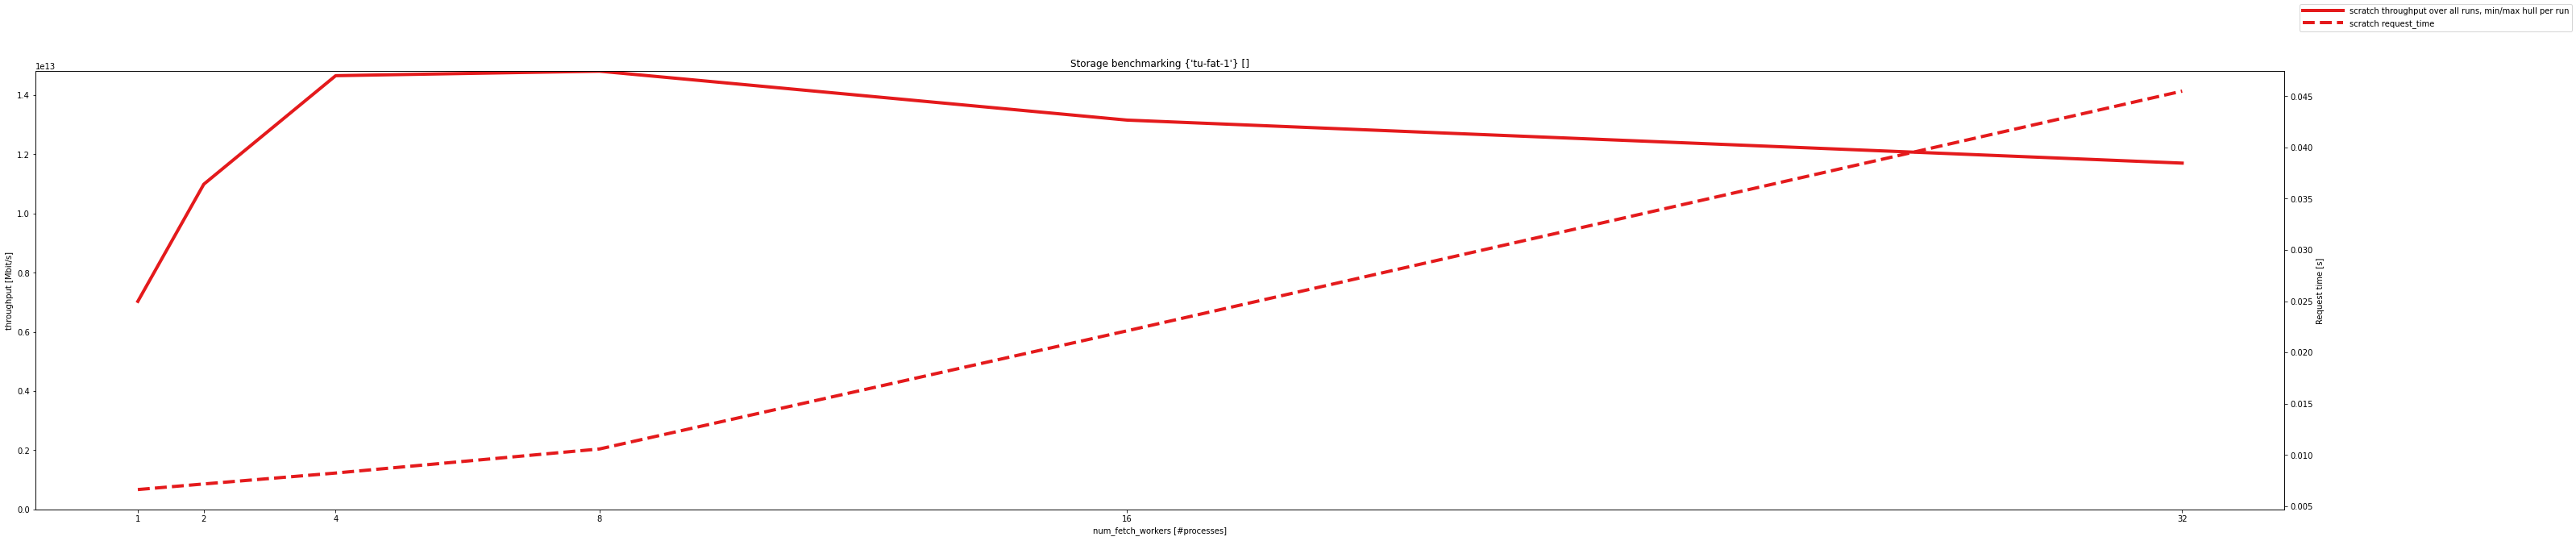

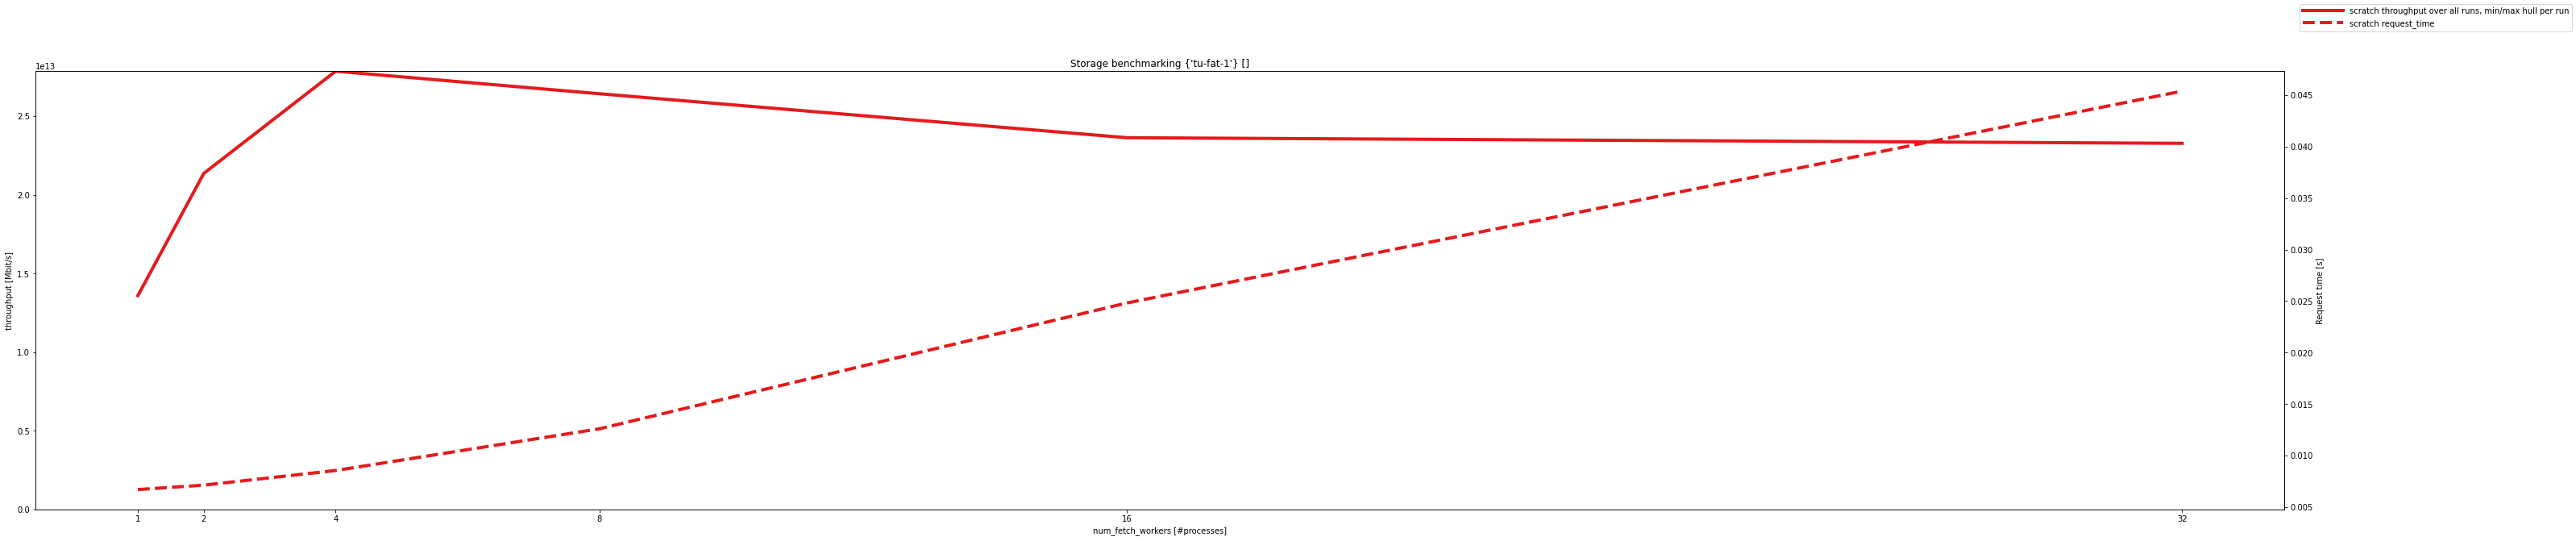

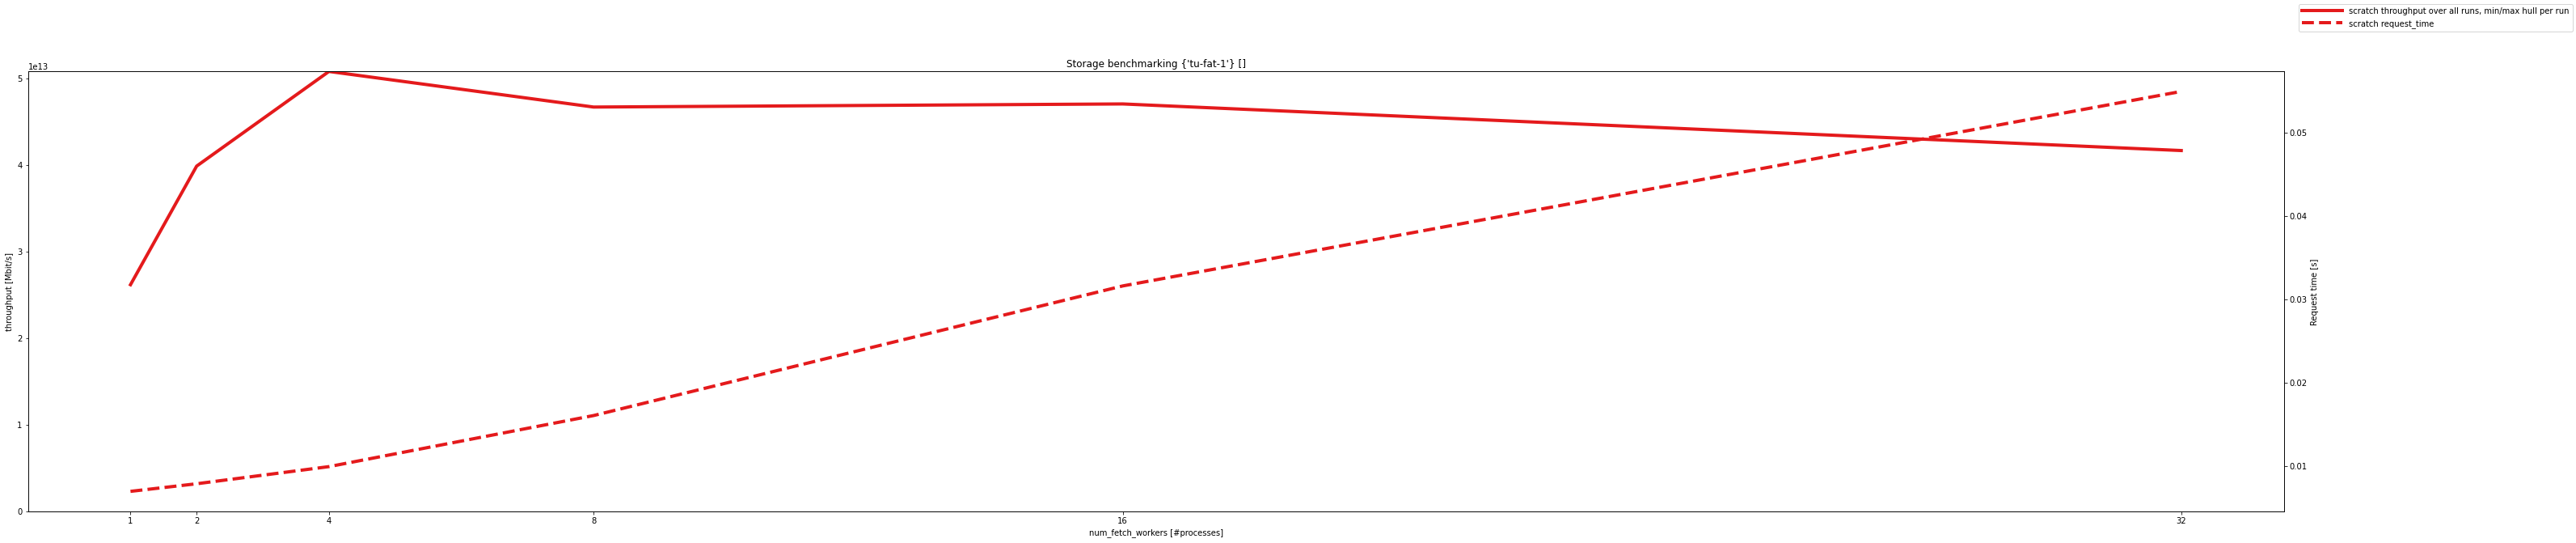

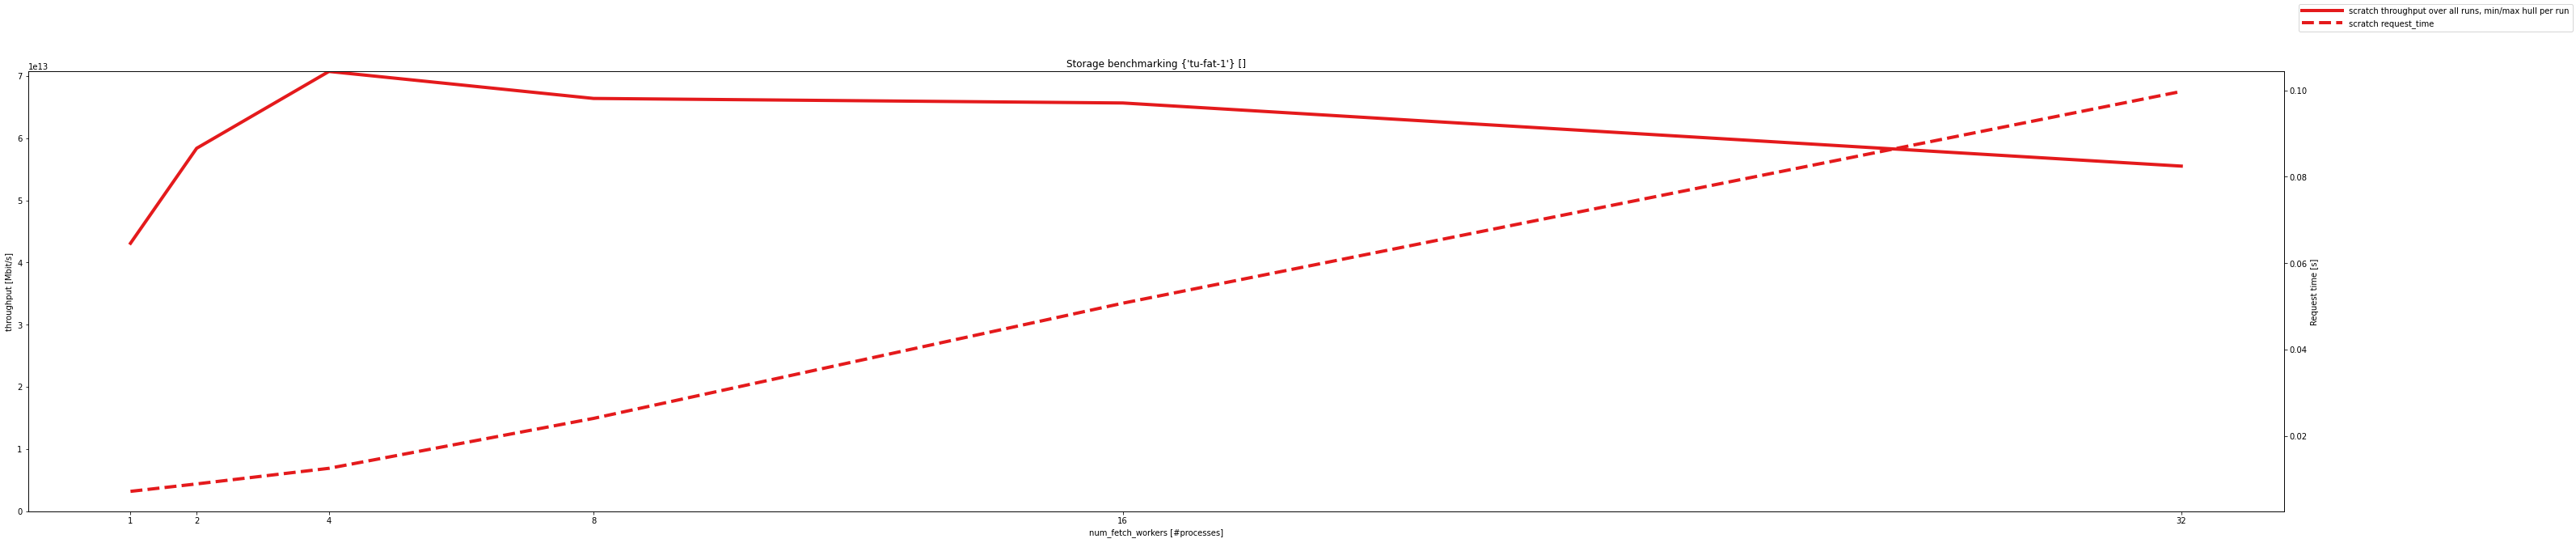

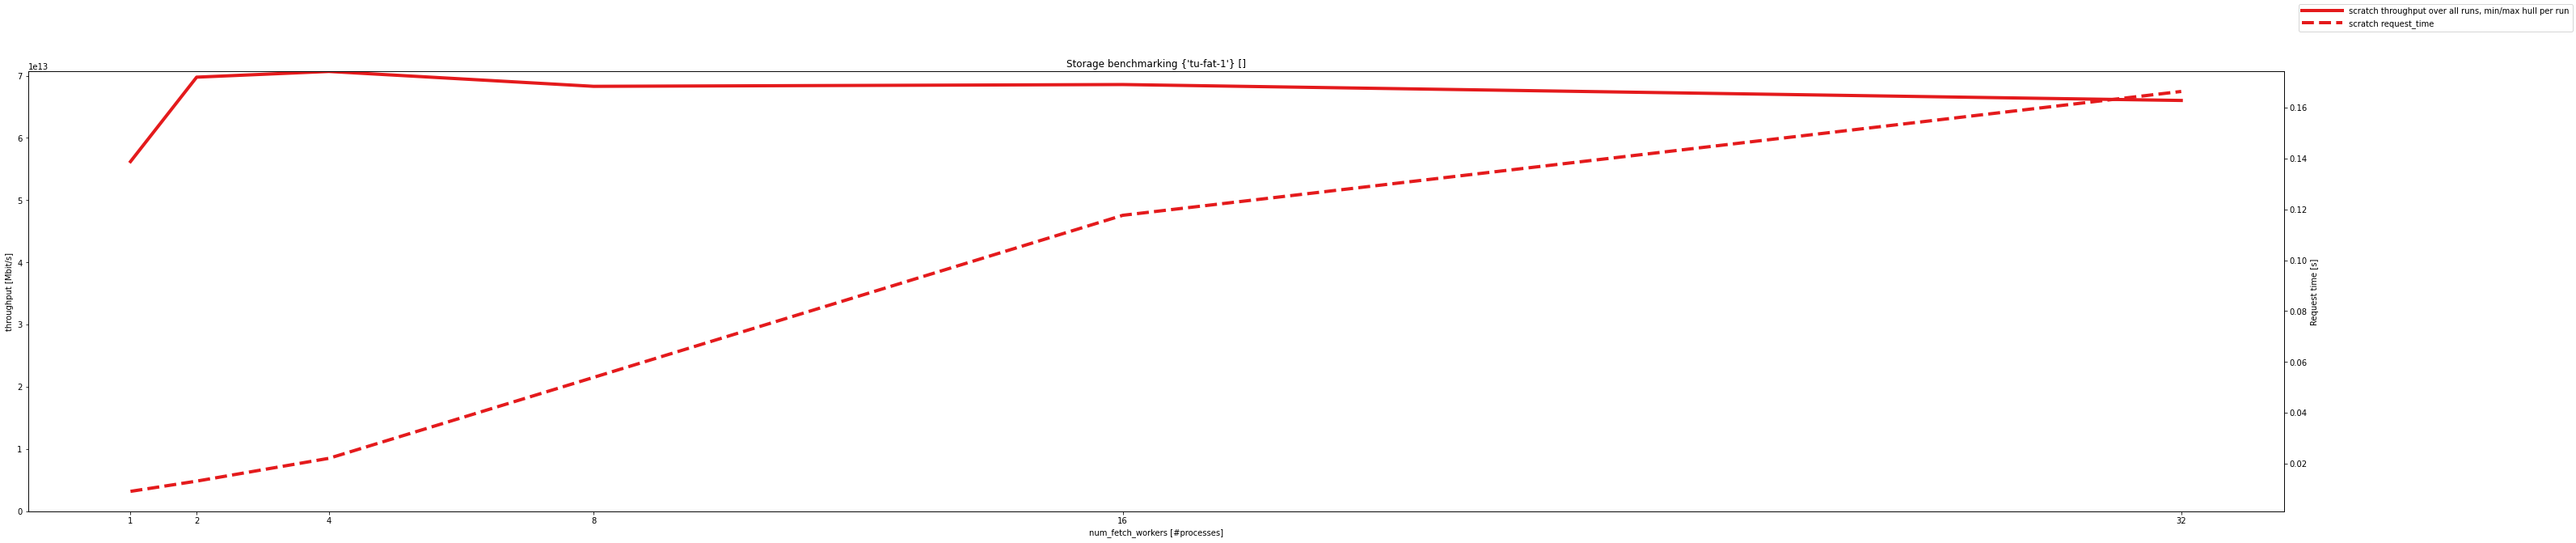

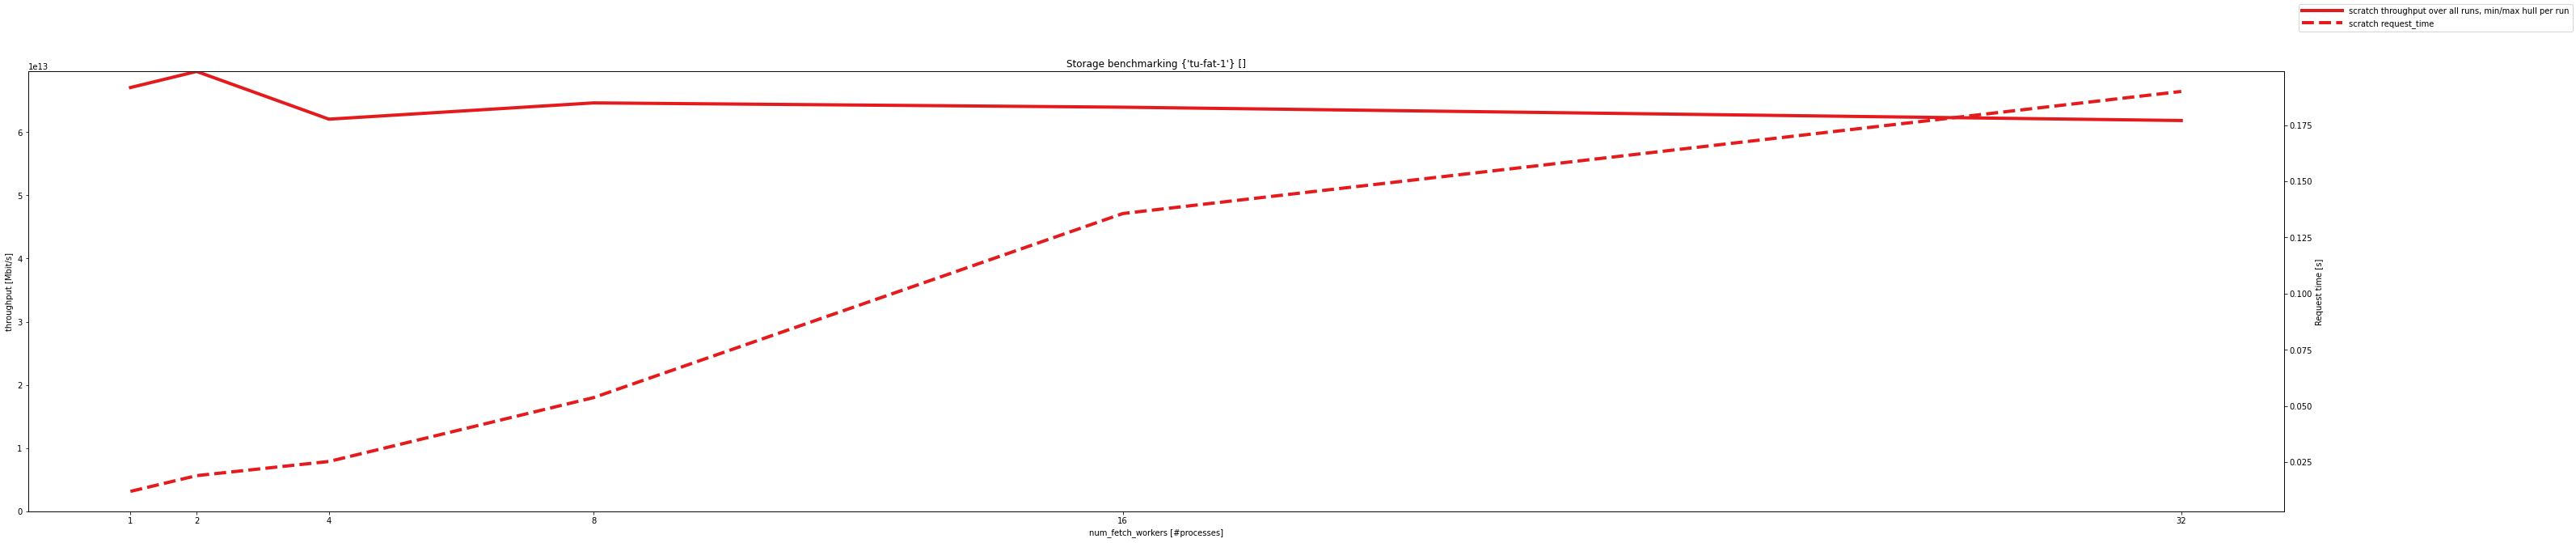

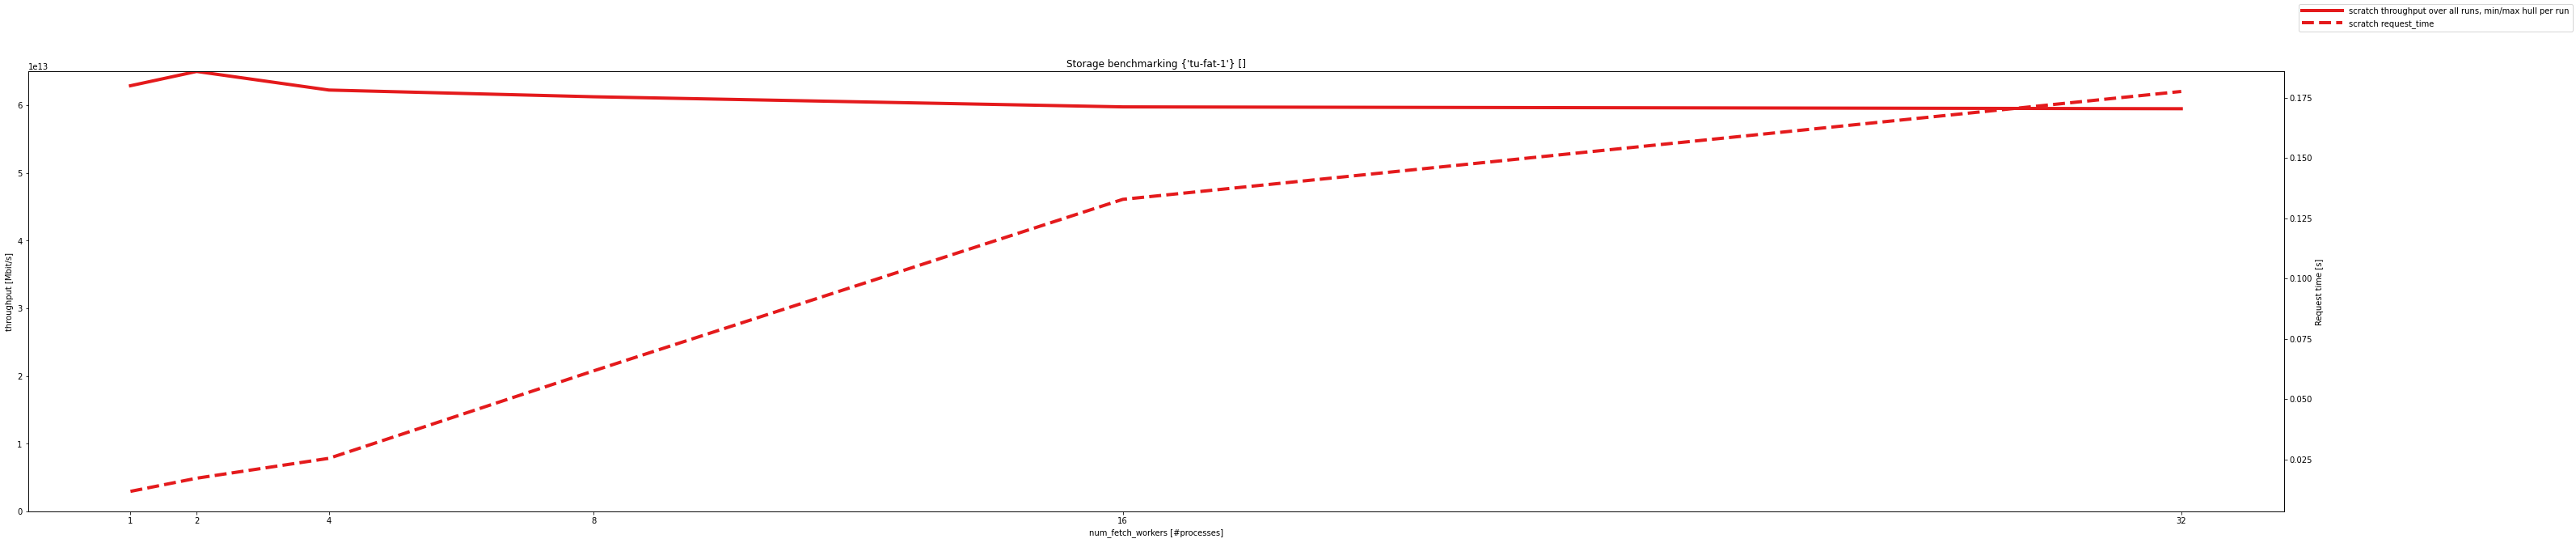

In [15]:
results_scratch = []
for i in [1, 2, 4, 8, 16, 32, 64, 128]:
    dfdl=scratch_dataset[scratch_dataset["num_workers"]==i]
    r = plot_throughput_per_storage_single(dfdl, group_by_dataloader, "scratch")
    results_scratch.append(r)
#     print(r)

In [16]:
def plot_tp(res):
    fig, axes = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)
    ax1=plt.subplot(1,2,1)
    ax2=plt.subplot(1,2,2)
    print(f"Len: {len(res)}")
    # results
    num_workers = []
    throughputs = []
    mrts = []
    for r in res:
        df_tp = r[0]["throughput"]
        df_mrt = r[0]["median_request_time"]
        df_tp = df_tp.reset_index(level=["dataset", "num_fetch_workers", "num_workers"])
        df_mrt = df_mrt.reset_index(level=["dataset", "num_fetch_workers", "num_workers"])
        ax1.plot(df_tp["num_fetch_workers"], np.log(df_tp["throughput [Mbit/s]"]))
        ax2.plot(df_mrt["num_fetch_workers"], np.log(df_mrt["median_request_time"]))
        
        ax1.set_xticks(df_tp["num_fetch_workers"])
        ax2.set_xticks(df_tp["num_fetch_workers"])

        num_workers.append(df_tp["num_workers"][0])

        ax1.set_ylabel("Throughput [Mbit/s, (log scale)]", loc="top")
        ax1.set_xlabel("Number of fetch workers", loc="center")

        ax2.set_ylabel("Median request time (log scale)]", loc="top")
        ax2.set_xlabel("Number of fetch workers", loc="center")

        ax1.grid(linestyle="--", which="both")
        ax2.grid(linestyle="--", which="both")
        throughputs.append(np.array(df_tp["throughput [Mbit/s]"]))
        print(np.array(df_tp["throughput [Mbit/s]"]))
        mrts.append(np.array(df_mrt["median_request_time"]))

    print(num_workers)
    ax1.legend(num_workers)
    ax2.legend(num_workers)
    return throughputs, mrts

Len: 8
[1.74706026e+11 3.32917410e+11 6.16795462e+11 9.82756366e+11
 1.23852764e+12 1.16799682e+12]
[3.47203987e+11 6.67150826e+11 1.17360862e+12 1.74368490e+12
 2.16731274e+12 1.95331554e+12]
[5.76339086e+11 1.22870437e+12 2.30999220e+12 2.98194392e+12
 3.67615535e+12 2.61179003e+12]
[1.21248224e+12 2.19573368e+12 3.84819588e+12 4.54790360e+12
 3.97021614e+12 2.20366475e+12]
[2.02346942e+12 3.77914362e+12 5.39571269e+12 4.91559142e+12
 3.65963628e+12 2.33717001e+12]
[3.72737886e+12 6.06862111e+12 6.43167717e+12 4.96936815e+12
 2.31564331e+12 1.74620115e+12]
[6.29546782e+12 7.10265910e+12 6.30324354e+12 3.49051833e+12
 1.76982495e+12 8.75376196e+11]
[6.56499065e+12 9.59296942e+12 5.93450973e+12 3.18941661e+12
 1.65847907e+12 8.42270905e+11]
[1, 2, 4, 8, 16, 32, 64, 128]


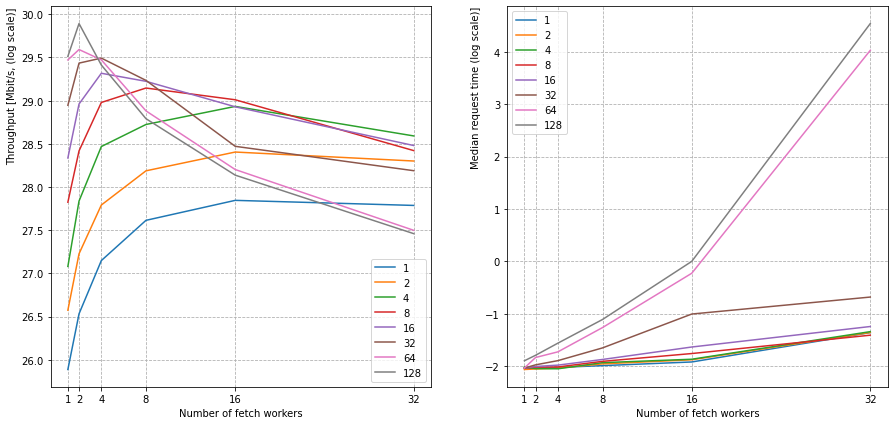

In [17]:
throughputs_s3, mrts_s3 = plot_tp(results_s3)

Len: 8
[3.98665031e+12 6.25129644e+12 8.03680541e+12 8.27443570e+12
 6.88178175e+12 6.43862008e+12]
[7.03179029e+12 1.09896145e+13 1.46569161e+13 1.48086829e+13
 1.31561716e+13 1.17028674e+13]
[1.35914680e+13 2.13665852e+13 2.78638559e+13 2.64302248e+13
 2.36348757e+13 2.32776041e+13]
[2.61575091e+13 3.98464647e+13 5.07715161e+13 4.66637354e+13
 4.70215870e+13 4.16430218e+13]
[4.30990093e+13 5.83688476e+13 7.07217771e+13 6.63829251e+13
 6.56529452e+13 5.55049243e+13]
[5.61974051e+13 6.97609068e+13 7.06772710e+13 6.82871444e+13
 6.85740628e+13 6.60182178e+13]
[6.70512960e+13 6.95944801e+13 6.20459868e+13 6.46198728e+13
 6.39388550e+13 6.18308624e+13]
[6.28691846e+13 6.49768012e+13 6.22295279e+13 6.12393098e+13
 5.97443827e+13 5.94720266e+13]
[1, 2, 4, 8, 16, 32, 64, 128]


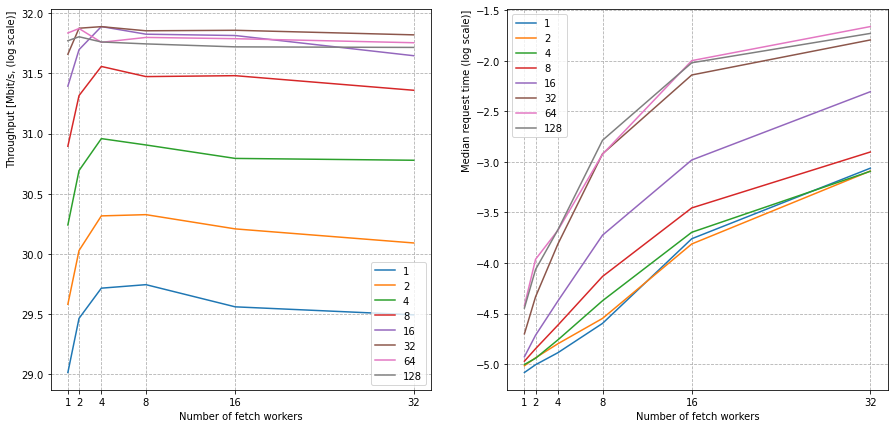

In [18]:
throughputs_scratch, mrts_scratch = plot_tp(results_scratch)
# results_scratch

In [19]:
def plot_heatmap(throughputs):
    fig, (ax1, ax2) = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)

    sns.heatmap(throughputs, 
                     linewidth = 0.5, 
                     cmap = 'RdYlGn',
                     annot=True,
                     fmt=".2f",
                     linewidths=.5,
                     xticklabels=[1, 2, 4, 8, 16, 32], 
                     yticklabels=[1, 2, 4, 8, 16, 32, 64, 128],
                     ax=ax1).invert_yaxis()
    sns.heatmap(mrts, 
                     linewidth = 0.5, 
                     cmap = 'RdYlGn_r',
                     annot=True,
                     fmt=".2f",
                     linewidths=.5,
                     xticklabels=[1, 2, 4, 8, 16, 32], 
                     yticklabels=[1, 2, 4, 8, 16, 32, 64, 128],
                     ax=ax2).invert_yaxis()

    ax1.set_title("Throughput [Mbit/s] (higher is better)")
    ax1.set_ylabel("Number of workers", loc="top")
    ax1.set_xlabel("Number of fetchers", loc="center")

    ax2.set_title("Median request time [s] (lower is better)")
    ax2.set_ylabel("Number of workers", loc="top")
    ax2.set_xlabel("Number of fetchers", loc="center")


In [20]:
throughputs_scratch

[array([3.98665031e+12, 6.25129644e+12, 8.03680541e+12, 8.27443570e+12,
        6.88178175e+12, 6.43862008e+12]),
 array([7.03179029e+12, 1.09896145e+13, 1.46569161e+13, 1.48086829e+13,
        1.31561716e+13, 1.17028674e+13]),
 array([1.35914680e+13, 2.13665852e+13, 2.78638559e+13, 2.64302248e+13,
        2.36348757e+13, 2.32776041e+13]),
 array([2.61575091e+13, 3.98464647e+13, 5.07715161e+13, 4.66637354e+13,
        4.70215870e+13, 4.16430218e+13]),
 array([4.30990093e+13, 5.83688476e+13, 7.07217771e+13, 6.63829251e+13,
        6.56529452e+13, 5.55049243e+13]),
 array([5.61974051e+13, 6.97609068e+13, 7.06772710e+13, 6.82871444e+13,
        6.85740628e+13, 6.60182178e+13]),
 array([6.70512960e+13, 6.95944801e+13, 6.20459868e+13, 6.46198728e+13,
        6.39388550e+13, 6.18308624e+13]),
 array([6.28691846e+13, 6.49768012e+13, 6.22295279e+13, 6.12393098e+13,
        5.97443827e+13, 5.94720266e+13])]

In [21]:
print("S3")
plot_heatmap(throughputs_s3, mrts_s3)

print("Scratch")
plot_heatmap(throughputs_scratch, mrts_scratch)

S3


TypeError: plot_heatmap() takes 1 positional argument but 2 were given

In [ ]:
workers=np.array([1, 2, 4, 8, 16, 32])
fetchers=np.array([1, 2, 4, 8, 16, 32, 64, 128])
r = np.multiply.outer(fetchers, workers)

In [ ]:
ax = sns.heatmap(throughputs_s3, 
             linewidth = 0.5, 
             cmap = 'RdYlGn',
             annot=r,
             fmt=".2f",
             cbar=False,
             linewidths=.5,
             xticklabels=[1, 2, 4, 8, 16, 32], 
             yticklabels=[1, 2, 4, 8, 16, 32, 64, 128]).invert_yaxis()
plt.title("Throughput [Mbit/s]")
plt.ylabel("Number of workers", loc="top")
plt.xlabel("Number of fetchers", loc="center")

In [ ]:
ax = sns.heatmap(throughputs_scratch, 
             linewidth = 0.5, 
             cmap = 'RdYlGn',
             annot=r,
             fmt=".2f",
             cbar=False,
             linewidths=.5,
             xticklabels=[1, 2, 4, 8, 16, 32], 
             yticklabels=[1, 2, 4, 8, 16, 32, 64, 128]).invert_yaxis()
plt.title("Throughput [Mbit/s]")
plt.ylabel("Number of workers", loc="top")
plt.xlabel("Number of fetchers", loc="center")